In [1]:
import pyspark
from pyspark.sql import SparkSession, functions
from pyspark import SparkContext, SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import lit

In [2]:
# Uncomment the following lines if you are using Windows!
import findspark
findspark.init()
findspark.find()

appName = "Project"
master = "local[*]"

# Create Configuration object for Spark.
# Memory configurations idea obtained from ChatGPT 
conf = pyspark.SparkConf()\
    .set('spark.driver.host','127.0.0.1')\
    .setAppName(appName)\
    .setMaster(master)\
    .set("spark.driver.memory", "15g")\
    .set("spark.executor.memory", "15g")\
    .set("spark.driver.maxResultSize", "4g")

# Create Spark Context with the new configurations rather than relying on the default one
sc = SparkContext.getOrCreate(conf=conf)

# You need to create SQL Context to conduct some database operations like what we will see later.
sqlContext = SQLContext(sc)

# If you have SQL context, you create the session from the Spark Context
spark = sqlContext.sparkSession.builder.getOrCreate()

C:\Users\diego\anaconda3\envs\mlpytorch\lib\site-packages\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


## Task 1

In [3]:
# Use of chatgpt to generate list.

schema = StructType([
    StructField("sofifa_id", IntegerType(), True),
    StructField("player_url", StringType(), True),
    StructField("short_name", StringType(), True),
    StructField("long_name", StringType(), True),
    StructField("player_positions", StringType(), True),
    StructField("overall", ShortType(), True),
    StructField("potential", ShortType(), True),
    StructField("value_eur", DoubleType(), True),
    StructField("wage_eur", DoubleType(), True),
    StructField("age", ShortType(), True),
    StructField("dob", StringType(), True),
    StructField("height_cm", ShortType(), True),
    StructField("weight_kg", ShortType(), True),
    StructField("club_team_id", DoubleType(), True),
    StructField("club_name", StringType(), True),
    StructField("league_name", StringType(), True),
    StructField("league_level", ShortType(), True),
    StructField("club_position", StringType(), True),
    StructField("club_jersey_number", ShortType(), True),
    StructField("club_loaned_from", StringType(), True),
    StructField("club_joined", StringType(), True),
    StructField("club_contract_valid_until", ShortType(), True),
    StructField("nationality_id", IntegerType(), True),
    StructField("nationality_name", StringType(), True),
    StructField("nation_team_id", DoubleType(), True),
    StructField("nation_position", StringType(), True),
    StructField("nation_jersey_number", ShortType(), True),
    StructField("preferred_foot", StringType(), True),
    StructField("weak_foot", ShortType(), True),
    StructField("skill_moves", ShortType(), True),
    StructField("international_reputation", ShortType(), True),
    StructField("work_rate", StringType(), True),
    StructField("body_type", StringType(), True),
    StructField("real_face", StringType(), True),
    StructField("release_clause_eur", IntegerType(), True),
    StructField("player_tags", StringType(), True),
    StructField("player_traits", StringType(), True),
    StructField("pace", ShortType(), True),
    StructField("shooting", ShortType(), True),
    StructField("passing", ShortType(), True),
    StructField("dribbling", ShortType(), True),
    StructField("defending", ShortType(), True),
    StructField("physic", ShortType(), True),
    StructField("attacking_crossing", ShortType(), True),
    StructField("attacking_finishing", ShortType(), True),
    StructField("attacking_heading_accuracy", ShortType(), True),
    StructField("attacking_short_passing", ShortType(), True),
    StructField("attacking_volleys", ShortType(), True),
    StructField("skill_dribbling", ShortType(), True),
    StructField("skill_curve", ShortType(), True),
    StructField("skill_fk_accuracy", ShortType(), True),
    StructField("skill_long_passing", ShortType(), True),
    StructField("skill_ball_control", ShortType(), True),
    StructField("movement_acceleration", ShortType(), True),
    StructField("movement_sprint_speed", ShortType(), True),
    StructField("movement_agility", ShortType(), True),
    StructField("movement_reactions", ShortType(), True),
    StructField("movement_balance", ShortType(), True),
    StructField("power_shot_power", ShortType(), True),
    StructField("power_jumping", ShortType(), True),
    StructField("power_stamina", ShortType(), True),
    StructField("power_strength", ShortType(), True),
    StructField("power_long_shots", ShortType(), True),
    StructField("mentality_aggression", ShortType(), True),
    StructField("mentality_interceptions", ShortType(), True),
    StructField("mentality_positioning", ShortType(), True),
    StructField("mentality_vision", ShortType(), True),
    StructField("mentality_penalties", ShortType(), True),
    StructField("mentality_composure", ShortType(), True),
    StructField("defending_marking_awareness", ShortType(), True),
    StructField("defending_standing_tackle", ShortType(), True),
    StructField("defending_sliding_tackle", ShortType(), True),
    StructField("goalkeeping_diving", ShortType(), True),
    StructField("goalkeeping_handling", ShortType(), True),
    StructField("goalkeeping_kicking", ShortType(), True),
    StructField("goalkeeping_positioning", ShortType(), True),
    StructField("goalkeeping_reflexes", ShortType(), True),
    StructField("goalkeeping_speed", ShortType(), True),
    StructField("ls", StringType(), True),
    StructField("st", StringType(), True),
    StructField("rs", StringType(), True),
    StructField("lw", StringType(), True),
    StructField("lf", StringType(), True),
    StructField("cf", StringType(), True),
    StructField("rf", StringType(), True),
    StructField("rw", StringType(), True),
    StructField("lam", StringType(), True),
    StructField("cam", StringType(), True),
    StructField("ram", StringType(), True),
    StructField("lm", StringType(), True),
    StructField("lcm", StringType(), True),
    StructField("cm", StringType(), True),
    StructField("rcm", StringType(), True),
    StructField("rm", StringType(), True),
    StructField("lwb", StringType(), True),
    StructField("ldm", StringType(), True),
    StructField("cdm", StringType(), True),
    StructField("rdm", StringType(), True),
    StructField("rwb", StringType(), True),
    StructField("lb", StringType(), True),
    StructField("lcb", StringType(), True),
    StructField("cb", StringType(), True),
    StructField("rcb", StringType(), True),
    StructField("rb", StringType(), True),
    StructField("gk", StringType(), True),
    StructField("player_face_url", StringType(), True),
    StructField("club_logo_url", StringType(), True),
    StructField("club_flag_url", StringType(), True),
    StructField("nation_logo_url", StringType(), True),
    StructField("nation_flag_url", StringType(), True),
])

col_names = [
    "sofifa_id","player_url","short_name","long_name","player_positions",
    "overall","potential","value_eur","wage_eur","age","dob","height_cm","weight_kg",
    "club_team_id","club_name","league_name","league_level","club_position","club_jersey_number",
    "club_loaned_from","club_joined","club_contract_valid_until",
    "nationality_id","nationality_name","nation_team_id","nation_position","nation_jersey_number",
    "preferred_foot","weak_foot","skill_moves","international_reputation","work_rate","body_type","real_face",
    "release_clause_eur","player_tags","player_traits",
    "pace","shooting","passing","dribbling","defending","physic",
    "attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys",
    "skill_dribbling","skill_curve","skill_fk_accuracy","skill_long_passing","skill_ball_control",
    "movement_acceleration","movement_sprint_speed","movement_agility","movement_reactions","movement_balance",
    "power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots",
    "mentality_aggression","mentality_interceptions","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure",
    "defending_marking_awareness","defending_standing_tackle","defending_sliding_tackle",
    "goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking","goalkeeping_positioning","goalkeeping_reflexes","goalkeeping_speed",
    "ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm","cm","rcm","rm",
    "lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb","gk",
    "player_face_url","club_logo_url","club_flag_url","nation_logo_url","nation_flag_url"
]

In [4]:
import os
files = [os.path.join('data_folder', f) for f in os.listdir('data_folder') if f.endswith('.csv')]

In [5]:
files[:3]

['data_folder\\female_players_16.csv',
 'data_folder\\female_players_17.csv',
 'data_folder\\female_players_18.csv']

In [6]:
%%time
df = spark.read.csv(files, header=True, schema=schema).toDF(*col_names)

CPU times: total: 31.2 ms
Wall time: 1.8 s


In [7]:
df.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: short (nullable = true)
 |-- potential: short (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: short (nullable = true)
 |-- dob: string (nullable = true)
 |-- height_cm: short (nullable = true)
 |-- weight_kg: short (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: short (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: short (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: string (nullable = true)
 |-- club_contract_valid_until: short (nullable = true)
 |-- nationality_id: integer (nullable = true)
 |-- national

In [8]:
# GeeksforGeeks. (2016, July 8). Regex Tutorial How to write Regular Expressions? GeeksforGeeks. https://www.geeksforgeeks.org/dsa/write-regular-expressions/

# Calculate year and gender
df = df.withColumn('data_year',functions.regexp_extract(functions.input_file_name(), r"(?:female_)?players_(\d+)\.csv", 1).cast('int') + 2000)
df = df.withColumn('gender',functions.when(
    functions.regexp_extract(functions.input_file_name(), r"(female_)?players_(\d+)\.csv", 1)!='',lit('female')).otherwise(lit('male')))

In [9]:
df.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: short (nullable = true)
 |-- potential: short (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: short (nullable = true)
 |-- dob: string (nullable = true)
 |-- height_cm: short (nullable = true)
 |-- weight_kg: short (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: short (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: short (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: string (nullable = true)
 |-- club_contract_valid_until: short (nullable = true)
 |-- nationality_id: integer (nullable = true)
 |-- national

In [11]:
db_properties={}
#update your db username
db_properties['username']="postgres"
#update your db password
db_properties['password']="N0s3m3p0!" 
#make sure you got the right port number here
db_properties['url']= "jdbc:postgresql://localhost:5432/fifa_db"
#make sure you had the Postgres JAR file in the right location
db_properties['driver']="org.postgresql.Driver"
db_properties['table']= "fifa.allplayers"

#Use append because create table was done on sql file
df.write.format("jdbc")\
.mode("append")\
.option("url", db_properties['url'])\
.option("dbtable", db_properties['table'])\
.option("user", db_properties['username'])\
.option("password", db_properties['password'])\
.option("driver", db_properties['driver'])\
.save()

In [12]:
# Read the DB back but without the female data for task 2
df = sqlContext.read.format("jdbc")\
 .option("url", db_properties['url'])\
 .option("dbtable", db_properties['table'])\
 .option("user", db_properties['username'])\
 .option("password", db_properties['password'])\
 .option("driver", db_properties['driver'])\
 .load()\
 .where("gender = 'male'")

In [13]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: short (nullable = true)
 |-- potential: short (nullable = true)
 |-- value_eur: float (nullable = true)
 |-- wage_eur: float (nullable = true)
 |-- age: short (nullable = true)
 |-- dob: string (nullable = true)
 |-- height_cm: short (nullable = true)
 |-- weight_kg: short (nullable = true)
 |-- club_team_id: float (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: short (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: short (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: string (nullable = true)
 |-- club_contract_valid_until: short (nullable = true)
 |-- nationality_id: integer

## Task 2

### 1

In [13]:
#In Year X, what were the Y clubs that had the highest number of players with contracts ending in year Z (or after)?
def top_clubs_player_contract_ending_year(df, year, num_clubs, year_end):
    if not (2015 <= year <= 2022):
        raise ValueError('Year must be between 2015 and 2022')
    if num_clubs <= 0:
        raise ValueError('Number of clubs must be a positive integer')
    if year_end < 2023:
        raise ValueError('Contract ending year should be 2023 or later')
    
    df_filtered = df.filter((df['data_year'] == year) & (df['club_contract_valid_until'].cast('int') >= year_end))
    return df_filtered.groupby('club_name').count().orderBy('count', ascending=False).limit(num_clubs)


top_clubs_player_contract_ending_year(df, 2021, 10, 2023).show()

+--------------------+-----+
|           club_name|count|
+--------------------+-----+
|          GwangJu FC|   28|
|  Zamora Fútbol Club|   27|
|Club Plaza de Dep...|   27|
|          Gangwon FC|   26|
|Sociedad Deportiv...|   26|
|          SL Benfica|   26|
|Club Atlético Nac...|   26|
|Club Deportivo El...|   26|
|         Busan IPark|   26|
|Club Social, Cult...|   25|
+--------------------+-----+



### 2

##### Doing 2 without handling the tie at nth position

In [14]:
#List the X clubs with the highest (or lowest) average player age for a given year Y.
def top_clubs_highest_average_age(df, year, num_clubs, lowest = True):
    if not (2015 <= year <= 2022):
        raise ValueError('Year must be between 2015 and 2022')
    if num_clubs < 0:
        raise ValueError('The number of clubs must be a positive integer')

    df_filtered = df.filter(df['data_year'] == year)    
    return df_filtered.groupby('club_name').avg('age').orderBy('avg(age)', ascending = lowest).limit(num_clubs)

top_clubs_highest_average_age(df, 2021, 10, True).show()
top_clubs_highest_average_age(df, 2019, 3, False).show()

+--------------------+------------------+
|           club_name|          avg(age)|
+--------------------+------------------+
|     FC Nordsjælland|20.703703703703702|
|FC Bayern München II|20.714285714285715|
|       SC Heerenveen|21.347826086956523|
|       AFC Wimbledon|21.607142857142858|
|        Lincoln City|21.925925925925927|
|            Barnsley|21.933333333333334|
|      RSC Anderlecht|22.142857142857142|
|     Strømsgodset IF| 22.14814814814815|
|Futebol Clube de ...|22.166666666666668|
|Chamois Niortais ...| 22.23076923076923|
+--------------------+------------------+

+---------+--------+
|club_name|avg(age)|
+---------+--------+
|   Paraná|    31.6|
| Cruzeiro|    30.6|
| Botafogo|    30.4|
+---------+--------+



##### Doing 2 handling the tie at nth position

In [15]:
#KAs. (2016, July 15). Retrieve top n in each group of a DataFrame in pyspark. Stack Overflow. https://stackoverflow.com/questions/38397796/retrieve-top-n-in-each-group-of-a-dataframe-in-pyspark

from pyspark.sql.window import Window
#List the X clubs with the highest (or lowest) average player age for a given year Y.
def top_clubs_highest_average_age(df, year, num_clubs, lowest = True):
    if not (2015 <= year <= 2022):
        raise ValueError('Year must be between 2015 and 2022')
    if num_clubs < 0:
        raise ValueError('The number of clubs must be a positive integer')

    df_filtered = df.filter(df['data_year'] == year)
    df_avg = df_filtered.groupby('club_name').avg('age')
    if lowest:
        window = Window.orderBy(df_avg['avg(age)'].asc())
    else:
        window = Window.orderBy(df_avg['avg(age)'].desc())
    ranked = df_avg.select('*', functions.rank().over(window).alias('rank'))
    return ranked.filter(ranked['rank'] <= num_clubs)

top_clubs_highest_average_age(df, 2021, 10, True).show()
top_clubs_highest_average_age(df, 2019, 3, False).show()

+--------------------+------------------+----+
|           club_name|          avg(age)|rank|
+--------------------+------------------+----+
|     FC Nordsjælland|20.703703703703702|   1|
|FC Bayern München II|20.714285714285715|   2|
|       SC Heerenveen|21.347826086956523|   3|
|       AFC Wimbledon|21.607142857142858|   4|
|        Lincoln City|21.925925925925927|   5|
|            Barnsley|21.933333333333334|   6|
|      RSC Anderlecht|22.142857142857142|   7|
|     Strømsgodset IF| 22.14814814814815|   8|
|Futebol Clube de ...|22.166666666666668|   9|
|Chamois Niortais ...| 22.23076923076923|  10|
+--------------------+------------------+----+

+--------------------+--------+----+
|           club_name|avg(age)|rank|
+--------------------+--------+----+
|              Paraná|    31.6|   1|
|            Cruzeiro|    30.6|   2|
|Club Athletico Pa...|    30.4|   3|
|            Botafogo|    30.4|   3|
|Associação Chapec...|    30.4|   3|
+--------------------+--------+----+



### 3

In [16]:
def most_common_nationality(df):
    return df.groupBy('nationality_name','data_year').count().groupBy('data_year').agg(functions.max_by('nationality_name', 'count'),functions.max('count')).orderBy('data_year')

most_common_nationality(df).show()

+---------+-------------------------------+----------+
|data_year|max_by(nationality_name, count)|max(count)|
+---------+-------------------------------+----------+
|     2015|                        England|      1627|
|     2016|                        England|      1519|
|     2017|                        England|      1627|
|     2018|                        England|      1633|
|     2019|                        England|      1625|
|     2020|                        England|      1670|
|     2021|                        England|      1685|
|     2022|                        England|      1719|
+---------+-------------------------------+----------+



In [17]:
# Given the comment on radescope Consider: this might not handle ties properly if multiple nationalities have the same max count in a given year
# Decided to create a new method which takes this into account 
def most_common_nationality_considering(df):
    counts = df.groupBy('nationality_name', 'data_year').count()
    window = Window.partitionBy('data_year').orderBy(functions.desc('count'))
    return counts.withColumn('r', functions.dense_rank().over(window)).filter(functions.col('r') == 1).drop('r').orderBy('data_year')

most_common_nationality_considering(df).show()

+----------------+---------+-----+
|nationality_name|data_year|count|
+----------------+---------+-----+
|         England|     2015| 1627|
|         England|     2016| 1519|
|         England|     2017| 1627|
|         England|     2018| 1633|
|         England|     2019| 1625|
|         England|     2020| 1670|
|         England|     2021| 1685|
|         England|     2022| 1719|
+----------------+---------+-----+



### 4

##### Do 4 showing all nationalities (messy) 

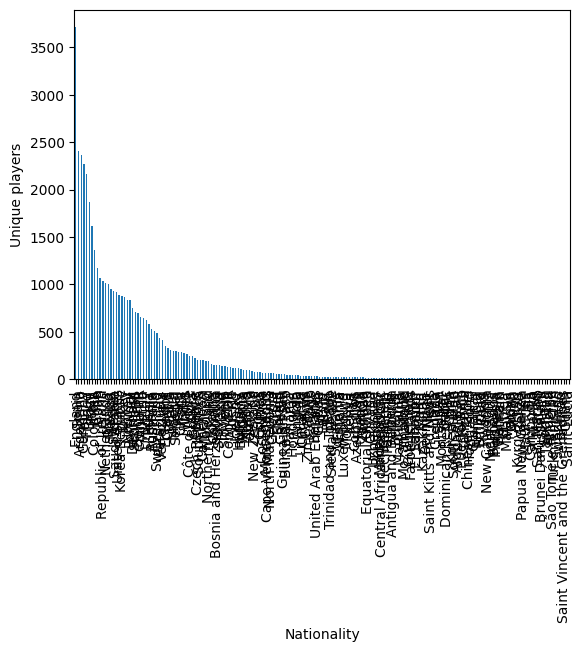

In [18]:
import pandas as pd
def show_histogram_nationalities(df):
    df_distinct = df.groupBy('sofifa_id').agg(functions.max_by('nationality_name','data_year').alias('nationality')).groupBy('nationality').count()
    pd_df = df_distinct.orderBy(functions.desc('count')).toPandas()
    ax = pd_df.plot.bar(x='nationality', y='count', legend=False)
    ax.set_xlabel('Nationality')
    ax.set_ylabel('Unique players')
    
show_histogram_nationalities(df)

##### Do 4 showing top_X nationalities (clean)

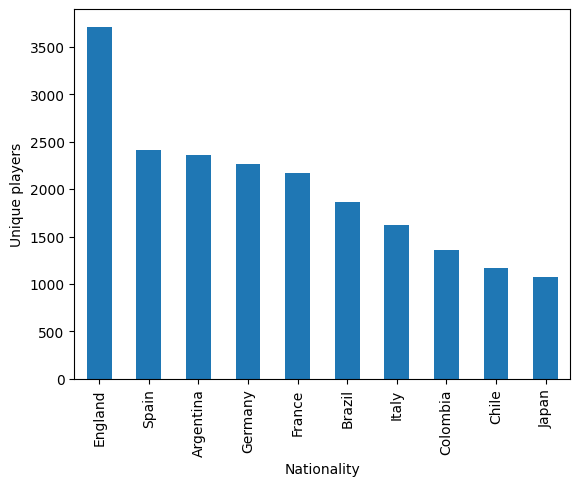

In [19]:
def show_histogram_nationalities_top(df,top_X):
    df_distinct = df.groupBy('sofifa_id').agg(functions.max_by('nationality_name','data_year').alias('nationality')).groupBy('nationality').count()
    pd_df = df_distinct.orderBy(functions.desc('count')).limit(top_X).toPandas()
    ax = pd_df.plot.bar(x='nationality', y='count', legend=False)
    ax.set_xlabel('Nationality')
    ax.set_ylabel('Unique players')
    
show_histogram_nationalities_top(df,10)

### 5

Check Task2_Q5_1.png and Task2_Q5_2.png

## We decided to create two versions of the producer.

- First version: It checks the latest YouTube videos for 5 minutes starting from the time the code is executed.

- Second version: It retrieves all videos from the 5 minutes prior to running the code.

## !!use one or the other, no point in using both!!

##### Producer #1

In [40]:
import socket
from confluent_kafka import Producer, KafkaError
import os
import time 
from googleapiclient.discovery import build
import json
from datetime import datetime, timedelta, timezone

# Kafka settings
BROKER = 'localhost:9092'  # Change this to your Kafka broker address
TOPIC = 'youtube_topic'  # Replace with your Kafka topic
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="cmu-class.json"
youtube = build('youtube', 'v3')
# Example tags
TAGS = ['fifa world cup', 'soccer', 'football', 'fifa']

def get_comments(tags):
    comments = []
    videos = []
    for tag in tags:
        search = youtube.search().list(
            part = 'id',
            q = tag,
            type = 'video',
            order = 'date',
            publishedAfter =  (datetime.now(timezone.utc) - timedelta(seconds=60)).isoformat(timespec='seconds').replace('+00:00', 'Z')
        ).execute()
        
        for item in search.get('items', []):
            vid = item['id'].get('videoId')
            if vid and vid not in videos:
                videos.append(vid)


    for video in videos:
        try:
            response = youtube.commentThreads().list(
                part='snippet',
                videoId=video,
                textFormat='plainText',
                fields=('items(snippet/topLevelComment/snippet(authorDisplayName,textDisplay,likeCount,publishedAt))')
            ).execute()
        except:
            continue

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comment_data = {
                'video_id': video,
                'author': comment['authorDisplayName'],
                'text': comment['textDisplay'],
                'like_count': comment['likeCount'],
                'published_at': comment['publishedAt'],
            }
            comments.append(comment_data)
    return comments

# Function to create a Kafka consumer
def create_kafka_producer(broker):
    conf = {
        'bootstrap.servers': broker,
        'client.id': socket.gethostname()
    }
    producer = Producer(conf)
    return producer

def stream_youtube_comments(tags):
    producer = create_kafka_producer(BROKER)
    seen = set()
    elapsed = 0
    max_time = 300
    rest_time = 60
    num_comments = 0
    while elapsed<max_time:
        comments = get_comments(tags)        
        for comment in comments:
            comment_id = f"Video: {comment['video_id']} on {comment['published_at']} by {comment['author']}"
            if comment_id in seen:
                continue
            # Send new comment to Kafka
            num_comments+=1
            seen.add(comment_id)
            producer.produce(TOPIC, key=comment_id, value=str(comment['text']))
        producer.flush()
        elapsed += rest_time
        print(f'Elapsed time: {elapsed}, Number of comments found so far: {num_comments}')
        time.sleep(rest_time)  # Poll for new comments every minute

stream_youtube_comments(TAGS)

Elapsed time: 60, Number of comments found so far: 0
Elapsed time: 120, Number of comments found so far: 0
Elapsed time: 180, Number of comments found so far: 0
Elapsed time: 240, Number of comments found so far: 0
Elapsed time: 300, Number of comments found so far: 0


##### Producer #2

In [41]:
import socket
from confluent_kafka import Producer, KafkaError
import os
import time 
from googleapiclient.discovery import build
import json
from datetime import datetime, timedelta, timezone

# Kafka settings
BROKER = 'localhost:9092'  # Change this to your Kafka broker address
TOPIC = 'youtube_topic_2'  # Replace with your Kafka topic
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="cmu-class.json"
youtube = build('youtube', 'v3')
# Example tags
TAGS = ['fifa world cup', 'soccer', 'football', 'fifa']

def get_comments(tags):
    comments = []
    videos = []
    for tag in tags:
        search = youtube.search().list(
            part = 'id',
            q = tag,
            type = 'video',
            order = 'date',
            publishedAfter =  (datetime.now(timezone.utc) - timedelta(seconds=300)).isoformat(timespec='seconds').replace('+00:00', 'Z')
        ).execute()
        
        for item in search.get('items', []):
            vid = item['id'].get('videoId')
            if vid and vid not in videos:
                videos.append(vid)


    for video in videos:
        try:
            response = youtube.commentThreads().list(
                part='snippet',
                videoId=video,
                textFormat='plainText',
                fields=('items(snippet/topLevelComment/snippet(authorDisplayName,textDisplay,likeCount,publishedAt))')
            ).execute()
        except:
            continue

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comment_data = {
                'video_id': video,
                'author': comment['authorDisplayName'],
                'text': comment['textDisplay'],
                'like_count': comment['likeCount'],
                'published_at': comment['publishedAt'],
            }
            comments.append(comment_data)
    return comments

# Function to create a Kafka consumer
def create_kafka_producer(broker):
    conf = {
        'bootstrap.servers': broker,
        'client.id': socket.gethostname()
    }
    producer = Producer(conf)
    return producer

def stream_youtube_comments(tags):
    producer = create_kafka_producer(BROKER)
    seen = set()
    elapsed = 0
    max_time = 300
    rest_time = 300
    num_comments = 0
    while elapsed<max_time:
        comments = get_comments(tags)        
        for comment in comments:
            comment_id = f"Video: {comment['video_id']} on {comment['published_at']} by {comment['author']}"
            if comment_id in seen:
                continue
            # Send new comment to Kafka
            num_comments+=1
            seen.add(comment_id)
            producer.produce(TOPIC, key=comment_id, value=str(comment['text']))
        producer.flush()
        elapsed += rest_time
        print(f'Elapsed time: {elapsed}, Number of comments found so far: {num_comments}')

stream_youtube_comments(TAGS)

Elapsed time: 300, Number of comments found so far: 0


#### Consumer

In [32]:
# Extract unique player names from Spark DF and convert them to lowercase
# (this list will be used later to check if comments mention any player by name)
# Reference: https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.cache.html
players_df = (
    df.select('short_name')
      .where(df['short_name'].isNotNull())
      .dropDuplicates()
)
players = [r['short_name'].lower() for r in players_df.collect()]

In [37]:
from confluent_kafka import Consumer, KafkaError, OFFSET_BEGINNING
import socket
from collections import Counter
import pyspark
from pyspark.sql import SparkSession, functions
from pyspark import SparkContext, SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import lit
import findspark
import re

# Kafka settings
BROKER = 'localhost:9092'  # Change this to your Kafka broker address
GROUP_ID = 'analytics'
TOPIC = 'youtube_topic'  # Replace with your Kafka topic

# Function to create a Kafka consumer
def create_kafka_consumer(broker, group_id, topic):
    conf = {
        'bootstrap.servers': broker,
        'group.id': group_id,
        'auto.offset.reset': 'earliest',
        'client.id': socket.gethostname()
    }
    consumer = Consumer(conf)
    def on_assign(c, partitions):
        for p in partitions:
            p.offset = OFFSET_BEGINNING
        c.assign(partitions)
        
    consumer.subscribe([topic], on_assign=on_assign)
    return consumer

# Display data from Kafka
def display_kafka_data():
    consumer = create_kafka_consumer(BROKER, GROUP_ID, TOPIC)    
    print("Listening to Kafka topic:", TOPIC)
    # user434180. (2010, August 29). How to find most common elements of a list? Stack Overflow. https://stackoverflow.com/questions/3594514/how-to-find-most-common-elements-of-a-list
    mentions = Counter()

    while True:
        msg = consumer.poll(timeout=1.0)       
        if msg is None:
            continue
        if msg.error():
            if msg.error().code() == KafkaError._PARTITION_EOF:
                continue
            else:
                print.error(msg.error())
                break
        
        comment_text = msg.value().decode('utf-8', errors='ignore').lower()
        print(f'Comment: {comment_text}')
        for player in players:
            if player in comment_text:
                mentions[player] += 1
        if mentions:
            top_player, count = mentions.most_common(1)[0]
            print(f"Most popular player so far: {top_player} ({count} mentions)")
        else:
            print('No comments mention any player by name')
        consumer.close()
        break


# Streamlit app title
print("Kafka Streamlit Consumer")
display_kafka_data()

Kafka Streamlit Consumer
Listening to Kafka topic: youtube_topic_2
Assigned partitions: []


KeyboardInterrupt: 

#### Consumer #2 which splits the comments to avoid substrings of comments being interpreted as players

In [39]:
from confluent_kafka import Consumer, KafkaError, OFFSET_BEGINNING
import socket
from collections import Counter
import pyspark
from pyspark.sql import SparkSession, functions
from pyspark import SparkContext, SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import lit
import findspark

# Kafka settings
BROKER = 'localhost:9092'  # Change this to your Kafka broker address
GROUP_ID = 'analytics'
TOPIC = 'youtube_topic_2'  # Replace with your Kafka topic

# Function to create a Kafka consumer
def create_kafka_consumer(broker, group_id, topic):
    conf = {
        'bootstrap.servers': broker,
        'group.id': group_id,
        'auto.offset.reset': 'earliest',
        'client.id': socket.gethostname()
    }
    consumer = Consumer(conf)
    def on_assign(c, partitions):
        for p in partitions:
            p.offset = OFFSET_BEGINNING
        c.assign(partitions)
        
    consumer.subscribe([topic], on_assign=on_assign)
    return consumer

# Display data from Kafka
def display_kafka_data():
    consumer = create_kafka_consumer(BROKER, GROUP_ID, TOPIC)    
    print("Listening to Kafka topic:", TOPIC)
    # user434180. (2010, August 29). How to find most common elements of a list? Stack Overflow. https://stackoverflow.com/questions/3594514/how-to-find-most-common-elements-of-a-list
    mentions = Counter()
    while True:
        msg = consumer.poll(timeout=1.0)       
        if msg is None:
            continue
        if msg.error():
            if msg.error().code() == KafkaError._PARTITION_EOF:
                continue
            else:
                print.error(msg.error())
                break
        
        comment_text = msg.value().decode('utf-8', errors='ignore').lower()
        print(f'Comment: {comment_text}')

        ## Split comment into words to avoid partial matches
        words = comment_text.split()
        
        for player in players:
                if player in words:
                    mentions[player] += 1
        if mentions:
            top_player, count = mentions.most_common(1)[0]
            print(f"Most popular player so far: {top_player} ({count} mentions)")
        else:
            print('No comments mention any player by name')
        consumer.close()
        break

# Streamlit app title
print("Kafka Streamlit Consumer")
display_kafka_data()

Kafka Streamlit Consumer
Listening to Kafka topic: youtube_topic_2
Comment: pickens or aj brown?
No comments mention any player by name


KeyboardInterrupt: 

# Refer to Task2_Q5_X.png pictures for the best case that we were able to find

## Task 3

### Data cleaning 

In [14]:
from pyspark.sql.functions import *
# List of columns to drop (non-relevant for the ML model)
# We chose to use the club_position as it has less unique combinations rather than player positions
cols_to_drop = [
    'id','sofifa_id','player_url','short_name','long_name','player_positions','value_eur','wage_eur','dob',
    'club_team_id','club_name','league_name','club_jersey_number',
    'club_loaned_from','club_joined','club_contract_valid_until','nationality_id',
    'nationality_name','nation_team_id','nation_position','nation_jersey_number',
    'body_type','real_face','release_clause_eur','player_traits','player_face_url',
    'club_logo_url','club_flag_url','nation_logo_url','nation_flag_url','data_year','gender']

# Drop them from the dataframe
df_cols_dropped = df.drop(*cols_to_drop)

In [15]:
null_counts_df = df_cols_dropped.select([count(when(col(c).isNull(), c)).alias(c) for c in df_cols_dropped.columns])
null_counts_df.show(truncate=False, vertical=True)

-RECORD 0-----------------------------
 overall                     | 0      
 potential                   | 0      
 age                         | 0      
 height_cm                   | 0      
 weight_kg                   | 0      
 league_level                | 2015   
 club_position               | 1630   
 preferred_foot              | 0      
 weak_foot                   | 0      
 skill_moves                 | 0      
 international_reputation    | 0      
 work_rate                   | 0      
 player_tags                 | 130765 
 pace                        | 15791  
 shooting                    | 15791  
 passing                     | 15791  
 dribbling                   | 15791  
 defending                   | 15791  
 physic                      | 15791  
 attacking_crossing          | 0      
 attacking_finishing         | 0      
 attacking_heading_accuracy  | 0      
 attacking_short_passing     | 0      
 attacking_volleys           | 0      
 skill_dribbling         

In [16]:
from pyspark.sql.functions import col, count, when
from pyspark.sql import DataFrame

# Count total rows
total_rows = df_cols_dropped.count()

# Calculate null count per column
null_counts = df_cols_dropped.select([
    count(when(col(c).isNull(), c)).alias(c) for c in df_cols_dropped.columns
]).collect()[0].asDict()

# Compute null % for each column
null_pct = {c: (null_counts[c] / total_rows) * 100 for c in df_cols_dropped.columns}

# Sort by % of missing values
sorted_nulls = sorted(null_pct.items(), key=lambda x: x[1], reverse=True)
for c, pct in sorted_nulls[:15]:
    print(f"{c:<35} {pct:>6.2f}% missing")

player_tags                          92.04% missing
goalkeeping_speed                    88.89% missing
mentality_composure                  22.37% missing
pace                                 11.11% missing
shooting                             11.11% missing
passing                              11.11% missing
dribbling                            11.11% missing
defending                            11.11% missing
physic                               11.11% missing
league_level                          1.42% missing
club_position                         1.15% missing
overall                               0.00% missing
potential                             0.00% missing
age                                   0.00% missing
height_cm                             0.00% missing


In [17]:
# We need to avoid dropping certain columns or rows just because they contain null values, since those missing values are expected 
# based on context,not because the data is MCAR. In this case, goalkeeping_speed: it is likely that outfield players don't 
# have goalkeeper data, but it is useful for the goalkeeper data
protected_cols = 'goalkeeping_speed'

cols_to_drop = [c for c, pct in null_pct.items() if pct > 50 and c not in protected_cols]

df_dropped_clean = df_cols_dropped.drop(*cols_to_drop)
print(f"\nRemaining columns: {len(df_dropped_clean.columns)}")

# We will Drop rows with >50% nulls
thresh = int(len(df_dropped_clean.columns) * 0.5)
df_dropped_clean = df_dropped_clean.na.drop(thresh=thresh)
print(f"\nRemaining rows after dropping sparse rows: {df_dropped_clean.count()}")

# No rows were dropped after applying the 50% null threshold, meaning all records had enough valid data.
# No further row filtering is necessary (gk or outfield player special cases).


Remaining columns: 80

Remaining rows after dropping sparse rows: 142079


In [18]:
# lastly, the columns that refer to positions need to be turned into continuous columns given the internal formula
position_cols = [
    "ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm","cm",
    "rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb","gk"]

df_clean = df_dropped_clean

# Using the Split Function in Spark DataFrames: A Complete Guide in Scala. (2023). Sparkcodehub.com. https://www.sparkcodehub.com/spark/dataframe/split-function
''' (2025). ChatGPT (November 7 version) [Large language model]. https://chat.openai.com/chat 
Prompt: "I keep getting the error:
Py4JJavaError: An error occurred while calling o2151.showString. : org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 13.0 failed 1 times, most recent failure: Lost task 0.0 in stage 13.0 (TID 17) (host.docker.internal executor driver): java.util.regex.PatternSyntaxException: Dangling meta character '+'
Answer: # SQL in expr: needs a double backslash to survive into SQL
expr(f"cast(cast(split({c}, '\\\\+')[0] as int) + cast(split({c}, '\\\\+')[1] as int) as short)")
'''
for c in position_cols:
    df_clean = df_clean.withColumn(c,when(col(c).isNull(),lit(None).cast("short"))
        .otherwise(when(size(split(col(c), "\+")) > 1,
                 expr(f"cast(cast(split({c}, '\\\\+')[0] as int) + cast(split({c}, '\\\\+')[1] as int) as short)"))
            .otherwise(when(size(split(col(c), "\-")) > 1,
                 expr(f"cast(cast(split({c}, '\\\\-')[0] as int) - cast(split({c}, '\\\\-')[1] as int) as short)"))
        .otherwise(col(c).cast("short")))))

In [19]:
df_clean.show(5, vertical=True)

-RECORD 0------------------------------------
 overall                     | 93            
 potential                   | 95            
 age                         | 27            
 height_cm                   | 169           
 weight_kg                   | 67            
 league_level                | 1             
 club_position               | CF            
 preferred_foot              | Left          
 weak_foot                   | 3             
 skill_moves                 | 4             
 international_reputation    | 5             
 work_rate                   | Medium/Low    
 pace                        | 93            
 shooting                    | 89            
 passing                     | 86            
 dribbling                   | 96            
 defending                   | 27            
 physic                      | 63            
 attacking_crossing          | 84            
 attacking_finishing         | 94            
 attacking_heading_accuracy  | 71 

In [20]:
df_clean.printSchema()

root
 |-- overall: short (nullable = true)
 |-- potential: short (nullable = true)
 |-- age: short (nullable = true)
 |-- height_cm: short (nullable = true)
 |-- weight_kg: short (nullable = true)
 |-- league_level: short (nullable = true)
 |-- club_position: string (nullable = true)
 |-- preferred_foot: string (nullable = true)
 |-- weak_foot: short (nullable = true)
 |-- skill_moves: short (nullable = true)
 |-- international_reputation: short (nullable = true)
 |-- work_rate: string (nullable = true)
 |-- pace: short (nullable = true)
 |-- shooting: short (nullable = true)
 |-- passing: short (nullable = true)
 |-- dribbling: short (nullable = true)
 |-- defending: short (nullable = true)
 |-- physic: short (nullable = true)
 |-- attacking_crossing: short (nullable = true)
 |-- attacking_finishing: short (nullable = true)
 |-- attacking_heading_accuracy: short (nullable = true)
 |-- attacking_short_passing: short (nullable = true)
 |-- attacking_volleys: short (nullable = true)
 |--

### Feature engineering - Doing it step by step 

In [22]:
nominal_cols = ['club_position', 'preferred_foot', 'work_rate']

binary_cols = []

numeric_categorical_cols = ['league_level', 'weak_foot', 'skill_moves', 'international_reputation']

continuous_cols = [
    'overall', 'potential', 'age', 'height_cm', 'weight_kg',
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed','ls', 'st', 'rs', 'lw', 'lf', 'cf',
    'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
    'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

In [23]:
print((df_clean.count(), len(df_clean.columns)))

(142079, 80)


In [24]:
# First have to take into account the special cases of goalkeeper skills missing from outfield players, and viceversa
is_gk = (instr(upper(col("club_position")), "GK") > 0)
gk_fill_cols = ["pace", "shooting", "passing", "dribbling", "defending", "physic"]
non_gk_fill_col = "goalkeeping_speed"
get_min_columns = gk_fill_cols + [non_gk_fill_col]

min_exprs = [min(when(col(c) > 0, col(c))).alias(c) for c in (get_min_columns)]
mins_row = df_clean.select(*min_exprs).collect()[0].asDict()

# Fill columns missing for GK
df_special_imputed = df_clean
for c in gk_fill_cols:
    df_special_imputed = df_special_imputed.withColumn(c,when(is_gk & col(c).isNull(), lit(mins_row[c])).otherwise(col(c)))

# Fill column missing for outfield players
df_special_imputed = df_special_imputed.withColumn(non_gk_fill_col,when(~is_gk & col(non_gk_fill_col).isNull(), lit(mins_row[non_gk_fill_col])).otherwise(col(non_gk_fill_col)))

In [25]:
mins_row

{'pace': 21,
 'shooting': 14,
 'passing': 20,
 'dribbling': 22,
 'defending': 14,
 'physic': 27,
 'goalkeeping_speed': 12}

In [26]:
null_counts_df_special = df_special_imputed.select([count(when(col(c).isNull(), c)).alias(c) for c in df_special_imputed.columns])
null_counts_df_special.show(truncate=False, vertical=True)

-RECORD 0----------------------------
 overall                     | 0     
 potential                   | 0     
 age                         | 0     
 height_cm                   | 0     
 weight_kg                   | 0     
 league_level                | 2015  
 club_position               | 1630  
 preferred_foot              | 0     
 weak_foot                   | 0     
 skill_moves                 | 0     
 international_reputation    | 0     
 work_rate                   | 0     
 pace                        | 10652 
 shooting                    | 10652 
 passing                     | 10652 
 dribbling                   | 10652 
 defending                   | 10652 
 physic                      | 10652 
 attacking_crossing          | 0     
 attacking_finishing         | 0     
 attacking_heading_accuracy  | 0     
 attacking_short_passing     | 0     
 attacking_volleys           | 0     
 skill_dribbling             | 0     
 skill_curve                 | 0     
 skill_fk_ac

In [27]:
#Impute all columns that are numeric and have null values
from pyspark.ml.feature import Imputer

# Impute all categorical numerical column with "Unknown" = -1
unknown = -1
df_catNum_Imp = df_special_imputed.fillna(unknown, numeric_categorical_cols)


# Impute all continuous columns with sentinel -9999
value_not_in_dataset = -9999
null_counts = null_counts_df_special.collect()[0].asDict()
columns_to_be_imputed = [c for c in continuous_cols if null_counts[c] > 0]
df_with_filled_na = df_catNum_Imp.fillna(value_not_in_dataset, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed = imputer.fit(df_with_filled_na).transform(df_with_filled_na)

# we will drop the old columns without imputation
for c in columns_to_be_imputed:
    df_imputed = df_imputed.drop(c).withColumnRenamed(f"{c}_imputed", c)

# Rename our newly imputed column with the correct name
df_fully_imputed = df_imputed

In [28]:
df_fully_imputed.summary().show(truncate=False, vertical=True)

-RECORD 0------------------------------------------
 summary                     | count               
 overall                     | 142079              
 potential                   | 142079              
 age                         | 142079              
 height_cm                   | 142079              
 weight_kg                   | 142079              
 league_level                | 142079              
 club_position               | 140449              
 preferred_foot              | 142079              
 weak_foot                   | 142079              
 skill_moves                 | 142079              
 international_reputation    | 142079              
 work_rate                   | 142079              
 attacking_crossing          | 142079              
 attacking_finishing         | 142079              
 attacking_heading_accuracy  | 142079              
 attacking_short_passing     | 142079              
 attacking_volleys           | 142079              
 skill_dribb

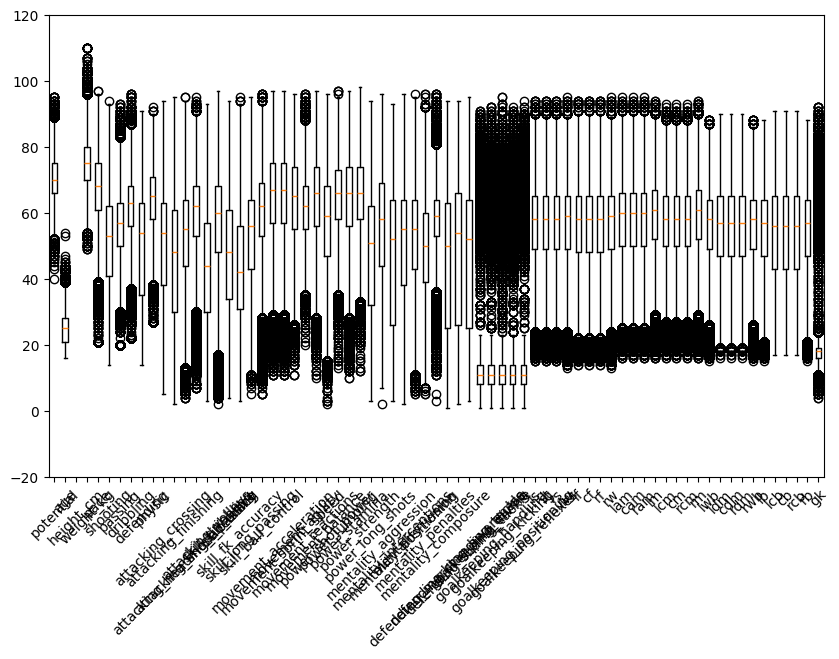

In [35]:
import matplotlib.pyplot as plt
import numpy as np 
#Extract data and convert them into Pandas for visualization
spotted_data = df_fully_imputed[continuous_cols].toPandas()
spotted_data = spotted_data.iloc[:, 1:]

valid_cols = []
for c in spotted_data.columns:
    s = spotted_data[c].dropna()
    if len(s) >= 5 and s.nunique() >= 2:
        iqr = np.percentile(s, 75) - np.percentile(s, 25)
        if iqr > 0:
            valid_cols.append(c)

data_list = [spotted_data[c].dropna().values for c in valid_cols]

plt.figure(figsize=(10, 6))
plt.boxplot(data_list, tick_labels=valid_cols) 
plt.xticks(rotation=45)
plt.ylim(-20,120)
plt.show()

In [36]:
from functools import reduce

def column_add(a,b):
     return  a.__add__(b)
    
def find_outliers(df):
    # Using the `for` loop to create new columns by identifying the outliers for each feature
    for column in continuous_cols:

        less_Q1 = 'less_Q1_{}'.format(column)
        more_Q3 = 'more_Q3_{}'.format(column)
        Q1 = 'Q1_{}'.format(column)
        Q3 = 'Q3_{}'.format(column)

        # Q1 : First Quartile ., Q3 : Third Quartile
        Q1 = df.approxQuantile(column,[0.25],relativeError=0)
        Q3 = df.approxQuantile(column,[0.75],relativeError=0)
        
        # IQR : Inter Quantile Range
        # We need to define the index [0], as Q1 & Q3 are a set of lists., to perform a mathematical operation
        # Q1 & Q3 are defined seperately so as to have a clear indication on First Quantile & 3rd Quantile
        IQR = Q3[0] - Q1[0]
        
        #selecting the data, with -1.5*IQR to + 1.5*IQR., where param = 1.5 default value
        less_Q1 =  Q1[0] - 1.5*IQR
        more_Q3 =  Q3[0] + 1.5*IQR
        
        isOutlierCol = 'is_outlier_{}'.format(column)
        
        df = df.withColumn(isOutlierCol,when((df[column] > more_Q3) | (df[column] < less_Q1), 1).otherwise(0))
    

    # Selecting the specific columns which we have added above, to check if there are any outliers
    selected_columns = [column for column in df.columns if column.startswith("is_outlier")]
    # Adding all the outlier columns into a new colum "total_outliers", to see the total number of outliers
    df = df.withColumn('total_outliers',reduce(column_add, ( df[col] for col in  selected_columns)))

    # Dropping the extra columns created above, just to create nice dataframe., without extra columns
    df = df.drop(*[column for column in df.columns if column.startswith("is_outlier")])

    return df
df_with_outlier_handling = find_outliers(df_fully_imputed)
df_with_outlier_handling.show(1, vertical=True)

-RECORD 0---------------------------------
 overall                     | 93         
 potential                   | 95         
 age                         | 27         
 height_cm                   | 169        
 weight_kg                   | 67         
 league_level                | 1          
 club_position               | CF         
 preferred_foot              | Left       
 weak_foot                   | 3          
 skill_moves                 | 4          
 international_reputation    | 5          
 work_rate                   | Medium/Low 
 attacking_crossing          | 84         
 attacking_finishing         | 94         
 attacking_heading_accuracy  | 71         
 attacking_short_passing     | 89         
 attacking_volleys           | 85         
 skill_dribbling             | 96         
 skill_curve                 | 89         
 skill_fk_accuracy           | 90         
 skill_long_passing          | 76         
 skill_ball_control          | 96         
 movement_a

In [37]:
df_with_outlier_handling.groupby("total_outliers").count().show()

+--------------+-----+
|total_outliers|count|
+--------------+-----+
|            31|  270|
|            34|  640|
|            28|  226|
|            26|  269|
|            27|  247|
|            12|  769|
|            22|  404|
|             1|11774|
|            13| 1105|
|             6|  101|
|            16|  711|
|             3|  991|
|            40|   44|
|            20|  522|
|             5|   88|
|            19|  593|
|            41|   19|
|            15|  869|
|            43|    5|
|            37|  263|
+--------------+-----+
only showing top 20 rows


In [38]:
print(df_with_outlier_handling.count())

142079


In [39]:
df_with_outlier_handling.agg(sum("total_outliers").alias("sum_total_outliers")).show()

+------------------+
|sum_total_outliers|
+------------------+
|            348537|
+------------------+



In [40]:
#Drop the rows with more than 9 outliers given that we imputed some rows with 6 columns as minimum 
df_with_substituted_na_and_outliers = df_with_outlier_handling.\
        filter(df_with_outlier_handling['total_Outliers']<=9)
print(df_with_substituted_na_and_outliers.count())

127596


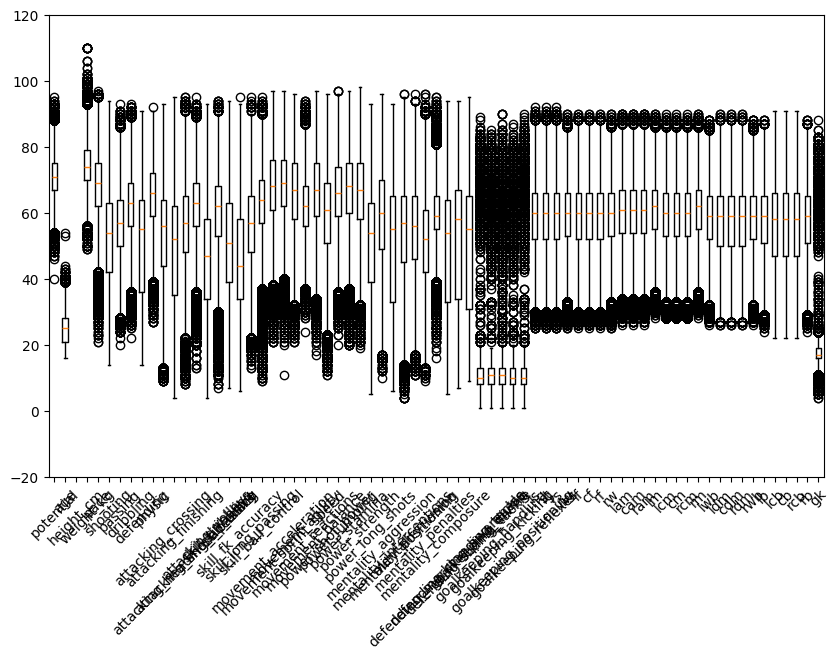

In [41]:
import matplotlib.pyplot as plt
import numpy as np 
#Extract data and convert them into Pandas for visualization
spotted_data_clean = df_with_substituted_na_and_outliers[continuous_cols].toPandas()
spotted_data_clean = spotted_data_clean.iloc[:, 1:]

valid_cols = []
for c in spotted_data_clean.columns:
    s = spotted_data_clean[c].dropna()
    if len(s) >= 5 and s.nunique() >= 2:
        iqr = np.percentile(s, 75) - np.percentile(s, 25)
        if iqr > 0:
            valid_cols.append(c)

data_list = [spotted_data_clean[c].dropna().values for c in valid_cols]

plt.figure(figsize=(10, 6))
plt.boxplot(data_list, tick_labels=valid_cols) 
plt.xticks(rotation=45)
plt.ylim(-20,120)
plt.show()

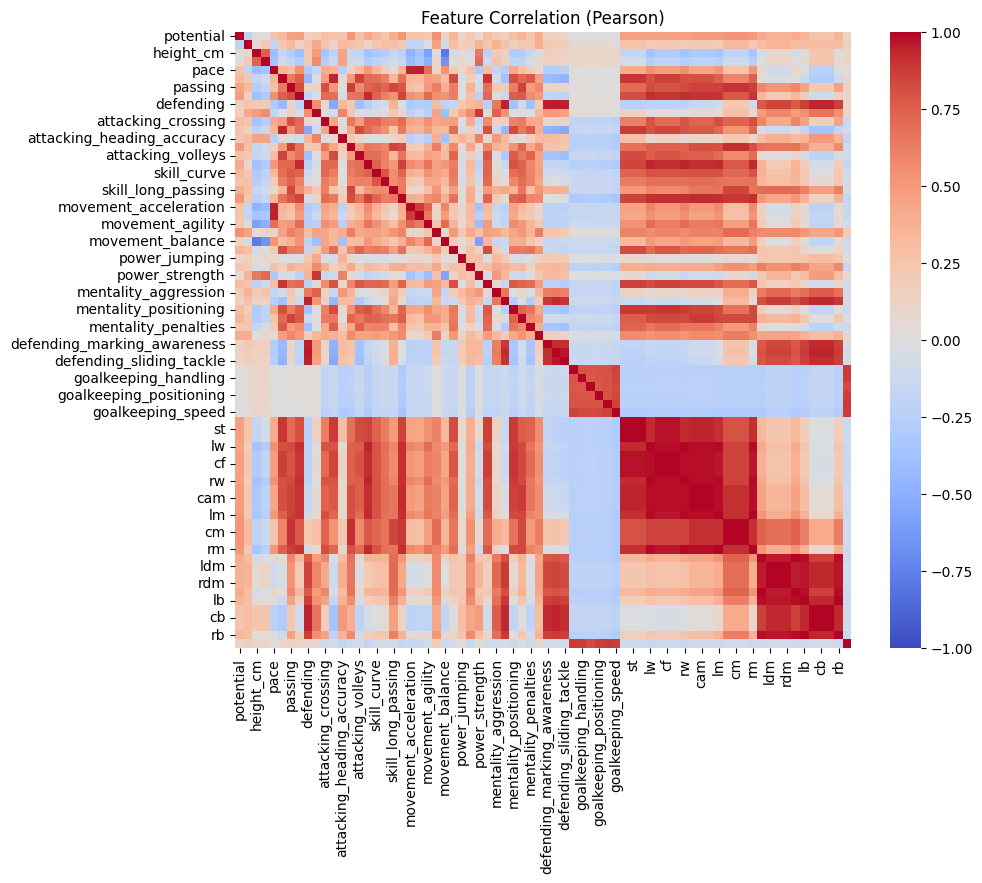

In [42]:
import seaborn as sb
corr = spotted_data_clean.corr(numeric_only=True, method="pearson")

plt.figure(figsize=(10,8))
sb.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", square=True, annot=False,fmt=".2f")
plt.title("Feature Correlation (Pearson)")
plt.show()

In [46]:
upper_mat = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# Columns to drop if any absolute corr > 0.8
to_drop = [c for c in upper_mat.columns if (upper_mat[c].abs() > 0.8).any()]
print(to_drop)

['dribbling', 'attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'power_shot_power', 'power_strength', 'power_long_shots', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']


In [47]:
correlated_columns = to_drop

df_with_handled_correlations = df_with_substituted_na_and_outliers.drop(*correlated_columns)

In [48]:
df_with_handled_correlations.columns

['overall',
 'potential',
 'age',
 'height_cm',
 'weight_kg',
 'league_level',
 'club_position',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'attacking_heading_accuracy',
 'skill_curve',
 'skill_fk_accuracy',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_jumping',
 'power_stamina',
 'mentality_aggression',
 'mentality_penalties',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'pace',
 'shooting',
 'passing',
 'defending',
 'physic',
 'mentality_composure',
 'total_outliers']

In [49]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

fill_map = {c: "Unknown" for c in nominal_cols}
df_cat_filled = df_with_handled_correlations.fillna(fill_map)

encode_cols = nominal_cols

# first part : transform the columns to numeric
index_cols = [f"{c}_idx" for c in encode_cols]
vec_cols   = [f"{c}_vec" for c in encode_cols]
indexers = [
    StringIndexer(inputCol=c, outputCol=idx, handleInvalid="keep")
    for c, idx in zip(encode_cols, index_cols)
]

# second part : one-hot encode the numeric columns
encoder = OneHotEncoder(inputCols=index_cols, outputCols=vec_cols, handleInvalid="keep")
# setup the pipeline
pipeline = Pipeline(stages=indexers + [encoder])

# fit the pipeline model and transform the data as defined
pipeline_model = pipeline.fit(df_cat_filled)
df_encoded = pipeline_model.transform(df_cat_filled)

In [50]:
print(df_encoded.select("club_position").distinct().count())
df_encoded.select("club_position","club_position_idx","club_position_vec").distinct().toPandas()

29


,club_position,club_position_idx,club_position_vec
0,ST,6.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,RB,4.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
2,LWB,22.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,LDM,13.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,RES,1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,RCB,3.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,RF,27.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,LW,19.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,CDM,17.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,RAM,25.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [51]:
df_encoded.show(1, vertical=True)

-RECORD 0------------------------------------
 overall                    | 90             
 potential                  | 90             
 age                        | 30             
 height_cm                  | 180            
 weight_kg                  | 80             
 league_level               | 1              
 club_position              | SUB            
 preferred_foot             | Left           
 weak_foot                  | 2              
 skill_moves                | 4              
 international_reputation   | 5              
 work_rate                  | High/Low       
 attacking_heading_accuracy | 50             
 skill_curve                | 85             
 skill_fk_accuracy          | 83             
 movement_agility           | 93             
 movement_reactions         | 89             
 movement_balance           | 91             
 power_jumping              | 61             
 power_stamina              | 78             
 mentality_aggression       | 47  

In [52]:
from pyspark.ml.feature import VectorAssembler

cont_existing = [c for c in continuous_cols if c in df_encoded.columns and c != 'overall']
num_cat_existing = [c for c in numeric_categorical_cols if c in df_encoded.columns]
feature_list = cont_existing + num_cat_existing + binary_cols + vec_cols

vector_assembler = VectorAssembler(
    inputCols=feature_list,
    outputCol="vectorized_features")

df_with_assembled_features = vector_assembler.transform(df_encoded)

df_with_assembled_features.select("vectorized_features").show(1, truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|vectorized_features                                                                                                                                                                                                                           |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(71,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,59,66],[90.0,30.0,180.0,80.0,93.0,86.0,83.0,32.0,64.0,50.0,85.0,83.0,93.0,89.0,91.0,61.0,78.0,47.0,80.0,59.0,10.0,8.0,11.0,5.0,1.0,2.0,4.0,5.0,1.0,1.0,1.0])|
+-----------------------------------

In [53]:
feature_list

['potential',
 'age',
 'height_cm',
 'weight_kg',
 'pace',
 'shooting',
 'passing',
 'defending',
 'physic',
 'attacking_heading_accuracy',
 'skill_curve',
 'skill_fk_accuracy',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_jumping',
 'power_stamina',
 'mentality_aggression',
 'mentality_penalties',
 'mentality_composure',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'league_level',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'club_position_vec',
 'preferred_foot_vec',
 'work_rate_vec']

In [54]:
df_train_raw,df_validate_raw,df_test_raw = df_with_assembled_features.randomSplit([0.8,0.1,0.1])

In [55]:
from pyspark.ml import Pipeline,Transformer
from pyspark.ml.feature import Imputer,StandardScaler,StringIndexer,OneHotEncoder, VectorAssembler

class OutcomeCreater(Transformer): # this defines a transformer that creates the outcome column
    def __init__(self):
        super().__init__()

    def _transform(self, dataset):
        output_df = dataset.withColumn('outcome', col('overall').cast(DoubleType())).drop("overall")
        return output_df
        
class KeepOnly(Transformer):
    def __init__(self, cols):
        super().__init__()
        self.cols = cols
    def _transform(self, dataset):
        keep = [c for c in self.cols if c in dataset.columns]
        return dataset.select(*keep)

# Stage where we scale the columns
stage_scaler = StandardScaler(inputCol= 'vectorized_features', outputCol= 'features', withStd=True, withMean=False)

# Stage for creating the outcome column representing the outcome
stage_outcome = OutcomeCreater()

# Removing all unnecessary columbs, only keeping the 'features' and 'outcome' columns
stage_keep_only = KeepOnly(cols=["features", "outcome"])

pipeline = Pipeline(stages=[stage_scaler,stage_outcome,stage_keep_only])

In [56]:
pipeline_model = pipeline.fit(df_train_raw)

train_v1 = pipeline_model.transform(df_train_raw)
val_v1 = pipeline_model.transform(df_validate_raw)
test_v1 = pipeline_model.transform(df_test_raw)

In [58]:
train_v1.show(2, truncate=False, vertical=True)

-RECORD 0----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 features | (71,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,58,61],[6.448062140153023,9.004981087643765,27.067159574200637,10.795141737523974,3.4374576810161463,2.602248218118052,4.00506882677588,1.8654702698884873,3.410043062542541,2.3832451560185146,2.6833346643992506,3.4934427453361

### Feature engineering - Doing it on a single Pipeline (not used in final version)

In [54]:
nominal_cols = [
    'club_position', 'preferred_foot', 'work_rate']

binary_cols = []

numeric_categorical_cols = ['league_level', 'weak_foot', 'skill_moves', 'international_reputation']

continuous_cols = [
    'overall', 'potential', 'age', 'height_cm', 'weight_kg',
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed','ls', 'st', 'rs', 'lw', 'lf', 'cf',
    'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
    'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

In [55]:
# Start from the df_clean given that data cleaning is before Feature engineering
df_train_raw,df_validate_raw,df_test_raw = df_clean.randomSplit([0.8,0.1,0.1])

In [56]:
from pyspark.ml import Pipeline,Transformer
from pyspark.ml.feature import Imputer,StandardScaler,StringIndexer,OneHotEncoder, VectorAssembler
from pyspark.sql.functions import min as spark_min

class GKFillOutfieldCols(Transformer):
    def __init__(self, position="club_position", cols=["pace","shooting","passing","dribbling","defending","physic"]):
        super().__init__()
        self.position = position
        self.cols = cols
    def _transform(self, df):
        cols = [c for c in self.cols if c in df.columns]
        mins = df.select(*[spark_min(col(c)).alias(c) for c in cols]).first().asDict()
        is_gk = (instr(upper(col(self.position)), "GK") > 0)
        out = df
        for c in cols:
            out = out.withColumn(c, when(is_gk & col(c).isNull(), lit(mins[c]).cast("short")).otherwise(col(c)))
        return out

class OutfiledFillGKCols(Transformer):
    def __init__(self, position="club_position", cols=["goalkeeping_speed"]):
        super().__init__()
        self.position = position
        self.cols = cols
    def _transform(self, df):
        cols = [c for c in self.cols if c in df.columns]
        mins = df.select(*[spark_min(col(c)).alias(c) for c in cols]).first().asDict()
        not_gk = ~(instr(upper(col(self.position)), "GK") > 0)
        out = df
        for c in cols:
            out = out.withColumn(c, when(not_gk & col(c).isNull(), lit(mins[c]).cast("short")).otherwise(col(c)))
        return out

class FillNumericCategoricals(Transformer):
    def __init__(self, cols, fill_value=-1):
        super().__init__()
        
        self.cols = cols
        self.fill_value = fill_value
    def _transform(self, dataset):
        fill_map = {c: self.fill_value for c in self.cols if c in dataset.columns}
        return dataset.fillna(fill_map)

class FillWithSentinel(Transformer):
    def __init__(self, cols, sentinel=-9999):
        super().__init__()
        self.cols = cols
        self.sentinel = sentinel
    def _transform(self, dataset):
        fill_map = {c: self.sentinel for c in self.cols if c in dataset.columns}
        return dataset.fillna(fill_map)

class ReplaceWithImputed(Transformer):
    def __init__(self, imputed_cols_map):
        super().__init__()
        self.imputed_cols_map = imputed_cols_map
    def _transform(self, dataset):
        df = dataset
        for orig, new in self.imputed_cols_map.items():
            if new in df.columns:
                df = df.drop(orig).withColumnRenamed(new, orig)
        return df

class FillNominals(Transformer):
    def __init__(self, cols, fill_value="Unknown"):
        super().__init__()
        self.cols = cols
        self.fill_value = fill_value

    def _transform(self, dataset):
        df = dataset
        for c in self.cols:
            if c in df.columns:
                df = df.withColumn(c,functions.when(functions.col(c).isNull(),functions.lit(self.fill_value)).otherwise(functions.col(c)).cast("string"))
        return df

class OutcomeCreater(Transformer): # this defines a transformer that creates the outcome column
    def __init__(self):
        super().__init__()

    def _transform(self, dataset):
        output_df = dataset.withColumn('outcome', col('overall').cast(DoubleType())).drop("overall")
        return output_df
        
class KeepOnly(Transformer):
    def __init__(self, cols):
        super().__init__()
        self.cols = cols
    def _transform(self, dataset):
        keep = [c for c in self.cols if c in dataset.columns]
        return dataset.select(*keep)

stage_fill_GK_cols = GKFillOutfieldCols()

stage_fill_Outfield_cols = OutfiledFillGKCols()
    
stage_fill_catnum = FillNumericCategoricals(cols=numeric_categorical_cols, fill_value=-1)

stage_fill_cont_sentinel = FillWithSentinel(cols=continuous_cols)

imputer_input = [c for c in continuous_cols]
imputer_output = [f"{c}_imputed" for c in imputer_input]
stage_imputer = Imputer(inputCols=imputer_input,outputCols=imputer_output,strategy="median").setMissingValue(-9999)

stage_replace_imputed = ReplaceWithImputed(imputed_cols_map=dict(zip(imputer_input, imputer_output)))

stage_fill_nominals = FillNominals(cols=nominal_cols, fill_value="Unknown")

# Stage where nominal columns are transformed to index columns using StringIndexer
nominal_id_cols = [x+"_index" for x in nominal_cols]
nominal_onehot_cols = [x+"_encoded" for x in nominal_cols]
stage_nominal_indexer = StringIndexer(inputCols = nominal_cols, outputCols = nominal_id_cols, handleInvalid="keep")

# Stage where the index columns are further transformed using OneHotEncoder
stage_nominal_onehot_encoder = OneHotEncoder(inputCols=nominal_id_cols, outputCols=nominal_onehot_cols, handleInvalid="keep")

# Stage where all relevant features are assembled into a vector
feature_cols = continuous_cols+numeric_categorical_cols+binary_cols+nominal_onehot_cols

#Remove correlated columns found in the step by step 
for col_name in correlated_columns:
    feature_cols.remove(col_name)
feature_cols.remove('overall')
stage_vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="vectorized_features")

# Stage where we scale the columns
stage_scaler = StandardScaler(inputCol= 'vectorized_features', outputCol= 'features')

# Stage for creating the outcome column representing whether there is attack 
stage_outcome = OutcomeCreater()

# Removing all unnecessary columns, only keeping the 'features' and 'outcome' columns
stage_keep_only = KeepOnly(cols=["features", "outcome"])


pipeline = Pipeline(stages=[stage_fill_GK_cols,stage_fill_Outfield_cols,stage_fill_catnum,stage_fill_cont_sentinel,
                            stage_imputer,stage_replace_imputed,stage_nominal_indexer,stage_nominal_onehot_encoder,
                            stage_vector_assembler,stage_scaler,stage_outcome,stage_keep_only])

In [57]:
pipeline_model = pipeline.fit(df_train_raw)

train_v2 = pipeline_model.transform(df_train_raw)
val_v2 = pipeline_model.transform(df_validate_raw)
test_v2 = pipeline_model.transform(df_test_raw)

In [58]:
train_v2.show(2, truncate=False, vertical=True)

-RECORD 0----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 features | (74,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,61,64],[10.513103709481493,4.083190653121646,26.45740367058785,9.717534920042956,4.838073603215188,2.8763115839765017,3.971310427413532,1.9155131364030

### Spark

In [59]:
#Choose one or the other pre processing
train = train_v1
val = val_v1
test = test_v1
#train = train_v2
#val = val_v2
#test = test_v2

#### Linear regresion

In [62]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [65]:
# Base estimator 
lr = LinearRegression(
    featuresCol="features",
    labelCol="outcome")

# Evaluator 
evaluator = RegressionEvaluator(
    labelCol="outcome",
    predictionCol="prediction",
    metricName="rmse"
)

# Hyperparameter grid (log scale for regParam)
lr_paramGrid = (ParamGridBuilder()
    .addGrid(lr.regParam,        [0.0, 1e-4, 1e-3, 1e-2, 1e-1])
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
    .addGrid(lr.maxIter,         [50, 100, 200])
    .build())

# Cross-validation
lr_cv = CrossValidator(
    estimator=lr,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=5,
    parallelism=8,
    seed=42
)

# Fit
lr_cv_model = lr_cv.fit(train)

In [66]:
# Best model
best_lr = lr_cv_model.bestModel
print("Best params:",
      "regParam=", best_lr._java_obj.getRegParam(),
      "elasticNetParam=", best_lr._java_obj.getElasticNetParam(),
      "maxIter=", best_lr._java_obj.getMaxIter())

Best params: regParam= 0.001 elasticNetParam= 0.5 maxIter= 50


In [68]:
# Evaluation in validation
val_preds  = best_lr.transform(val)

# Validation evaluation
rmse_val = evaluator.evaluate(val_preds)  # RMSE

mae_val = RegressionEvaluator(
    labelCol="outcome", predictionCol="prediction", metricName="mae"
).evaluate(val_preds)

r2_val = RegressionEvaluator(
    labelCol="outcome", predictionCol="prediction", metricName="r2"
).evaluate(val_preds)

print(f"[VALIDATION] RMSE={rmse_val:.4f} | MAE={mae_val:.4f} | R²={r2_val:.4f}")

[VALIDATION] RMSE=1.8436 | MAE=1.4396 | R²=0.9304


In [83]:
## Evaluation on test set 
test_preds = best_lr.transform(test)


rmse_test = evaluator.evaluate(test_preds)  # RMSE

mae_test = RegressionEvaluator(
    labelCol="outcome", predictionCol="prediction", metricName="mae"
).evaluate(test_preds)

r2_test = RegressionEvaluator(
    labelCol="outcome", predictionCol="prediction", metricName="r2"
).evaluate(test_preds)

print(f"[LR | TEST] RMSE={rmse_test:.4f} | MAE={mae_test:.4f} | R²={r2_test:.4f}")

[LR | TEST] RMSE=1.8538 | MAE=1.4531 | R²=0.9270


#### Random forest

In [78]:
#  Speed-up configuration for local Spark
train = train.cache()
train.count()
spark.conf.set("spark.sql.shuffle.partitions", "32")   
spark.conf.set("spark.default.parallelism", "22") 

In [79]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Estimator
rf = RandomForestRegressor(
    featuresCol="features",
    labelCol="outcome",
    seed=42
)

# Evaluator
evaluator = RegressionEvaluator(
    labelCol="outcome",
    predictionCol="prediction",
    metricName="rmse"
)


rf_paramGrid = (ParamGridBuilder()
    .addGrid(rf.numTrees, [25, 150, 100])
    .addGrid(rf.maxDepth, [5, 10, 12])
    .build())

# Cross-validation
rf_cv = CrossValidator(
    estimator=rf,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=5,
    parallelism=16,
    seed=42
)

# Fit 
rf_cv_model = rf_cv.fit(train)

In [80]:
best_rf = rf_cv_model.bestModel
print(
    "Best RF params:",
    "numTrees=", best_rf.getNumTrees,
    "maxDepth=", best_rf.getOrDefault("maxDepth"),
)

Best RF params: numTrees= 150 maxDepth= 12


In [81]:
# Validation predictions
rf_val_preds = best_rf.transform(val)

rf_rmse_val = evaluator.evaluate(rf_val_preds)

rf_mae_val = RegressionEvaluator(
    labelCol="outcome", predictionCol="prediction", metricName="mae"
).evaluate(rf_val_preds)

rf_r2_val = RegressionEvaluator(
    labelCol="outcome", predictionCol="prediction", metricName="r2"
).evaluate(rf_val_preds)

print(f"[RF | VALIDATION] RMSE={rf_rmse_val:.4f} | MAE={rf_mae_val:.4f} | R²={rf_r2_val:.4f}")

[RF | VALIDATION] RMSE=1.1486 | MAE=0.8201 | R²=0.9730


In [84]:
## Evaluation on test set 
test_preds = best_rf.transform(test)


rmse_test = evaluator.evaluate(test_preds)  # RMSE

mae_test = RegressionEvaluator(
    labelCol="outcome", predictionCol="prediction", metricName="mae"
).evaluate(test_preds)

r2_test = RegressionEvaluator(
    labelCol="outcome", predictionCol="prediction", metricName="r2"
).evaluate(test_preds)

print(f"[RF | TEST] RMSE={rmse_test:.4f} | MAE={mae_test:.4f} | R²={r2_test:.4f}")

[RF | TEST] RMSE=1.1541 | MAE=0.8247 | R²=0.9717


We tuned key hyperparameters for both models using grid search and cross-validation.
For Linear Regression, the most important ones were elasticNetParam, which controls the mix between L1 and L2 regularization, and maxIter, which ensures proper model convergence.
For Random Forest, tuning the number and depth of trees (numTrees, maxDepth) was crucial to balance bias and variance.
These parameters had a clear impact on performance, with Random Forest achieving better generalization (R² = 0.97).

### Pytorch

In [90]:
from pyspark.ml.functions import vector_to_array
from streaming.base.converters.dataframe_to_mds import dataframe_to_mds
from torch.utils.data import DataLoader
import streaming
from streaming import StreamingDataset

# Define the function that write the Spark DataFrame to files using `mosaic-streaming`
def write_df_to_mds(outpath,dataframe):
    # Convert the Spark DataFrame to a format that can be written to MDS, mainliy converting the vector column to array column
    dataframe_converted = dataframe.withColumn("features", vector_to_array("features"))\
                                   .withColumn("features",col("features").cast(ArrayType(FloatType(), True)))\
                                   .withColumn("outcome",col("outcome").cast(LongType()))
    mds_kwargs = {
        "out": outpath,
        "columns": {"features": "ndarray:float32", "outcome": "int64"}
    }
    dataframe_to_mds(
        dataframe_converted,
        mds_kwargs = mds_kwargs
    )

# Now write the three datasets to files using the defined function.
write_df_to_mds("mds/train_mds",train)
write_df_to_mds("mds/validate_mds",val)
write_df_to_mds("mds/test_mds",test)

# Now create the dataset by using StreamingDataset from mosaic-streaming
train_dataset = StreamingDataset(local="mds/train_mds", batch_size=1024)
validate_dataset = StreamingDataset(local="mds/validate_mds", batch_size=1024)
test_dataset = StreamingDataset(local="mds/test_mds", batch_size=1024)

train_dataloader = DataLoader(train_dataset, batch_size=1024, num_workers=8, persistent_workers=True, pin_memory=True)
validate_dataloader = DataLoader(validate_dataset, batch_size=1024, num_workers=8, persistent_workers=True, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=1024, num_workers=8, persistent_workers=True, pin_memory=True)

Path mds/train_mds is interpreted as a local path. If this is actually mounted distributed storage, it will work, but consider also specifying a local temp path. Pass a (local, remote) tuple as "out", as in ("/local_disk0/my_tmp", "mds/train_mds")
Directory mds/train_mds exists and not empty. But continue to mkdir since exist_ok is set to be True.


In [94]:
train_dataset[0]['features'].shape[0]

71

#### NN -1

In [95]:
import torch
from torch import nn, optim

#Shallow simple model
class Project_1(nn.Module):
    def __init__(self,N_in=71,N_out=1):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(N_in,16),
            nn.ReLU(),
            nn.Linear(16,16),
            nn.ReLU(),
            nn.Linear(16,N_out)
        )

    def forward(self,X):
        return self.seq(X)

model = Project_1()
print(model)

Project_1(
  (seq): Sequential(
    (0): Linear(in_features=71, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)


We will use the GPU available on our laptops to speed up the process

In [97]:
import torch
torch.backends.cudnn.benchmark = True 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = model.to(device)

Using device: cuda


In [109]:
# Hyperparameters
lr = 1e-4
N_epochs = 200

# Loss and optimizer (regression)
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=1e-5)

# History
train_losses, val_losses = [], []
train_rmse_hist, val_rmse_hist = [], []
train_mae_hist,  val_mae_hist  = [], []
train_r2_hist,   val_r2_hist   = [], []

# Early stopping by validation RMSE
patience  = 20
min_delta = 0.02
best_val  = float('inf')
best_state = None
best_metrics = None
best_epoch  = -1 
bad_epochs = 0

for epoch in range(N_epochs):

    # Train
    model.train()
    batch_loss = []

    # accumulators for regression metrics
    n = 0
    sum_abs_err = 0.0
    sum_sq_err  = 0.0
    sum_y = 0.0
    sum_y2 = 0.0

    for batch in train_dataloader:
        # move to device and cast to float
        x = batch['features'].to(device, non_blocking=True).float()
        y = batch['outcome'].to(device, non_blocking=True).float().view(-1, 1)

        # forward + loss
        y_pred = model(x)                  
        loss = loss_fun(y_pred, y)   # MSE

        # backward + step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # track batch loss
        batch_loss.append(loss.detach().cpu().item())

        # accumulate metrics
        err = (y_pred - y)
        n += y.numel()
        sum_abs_err += err.abs().sum().item()
        sum_sq_err  += (err**2).sum().item()
        sum_y  += y.sum().item()
        sum_y2 += (y**2).sum().item()

    # epoch metrics (train)
    train_loss = float(np.mean(batch_loss))
    # safe denominator
    if n == 0:
        n = 1
    train_rmse = np.sqrt(sum_sq_err / n)
    train_mae  = (sum_abs_err / n)
    ss_tot = sum_y2 - (sum_y ** 2) / n
    if ss_tot <= 0:
        ss_tot = 1e-12  
    train_r2 = 1.0 - (sum_sq_err / ss_tot)

    # Validation
    model.eval()
    validate_batch_loss = []

    n = 0
    sum_abs_err = 0.0
    sum_sq_err  = 0.0
    sum_y = 0.0
    sum_y2 = 0.0

    with torch.no_grad():
        for batch in validate_dataloader:
            x = batch['features'].to(device, non_blocking=True).float()
            y = batch['outcome'].to(device, non_blocking=True).float().view(-1, 1)

            y_pred = model(x)
            vloss = loss_fun(y_pred, y)

            # track batch loss
            validate_batch_loss.append(vloss.detach().cpu().item())

            # accumulate metrics
            err = (y_pred - y)
            n += y.numel()
            sum_abs_err += err.abs().sum().item()
            sum_sq_err  += (err**2).sum().item()
            sum_y  += y.sum().item()
            sum_y2 += (y**2).sum().item()

    # epoch metrics (val)
    val_loss = float(np.mean(validate_batch_loss))
    # safe denominator
    if n == 0:
        n = 1
    val_rmse = np.sqrt(sum_sq_err / n)
    val_mae  = (sum_abs_err / n)

    ss_tot = sum_y2 - (sum_y ** 2) / n
    if ss_tot <= 0:
        ss_tot = 1e-12
    val_r2 = 1.0 - (sum_sq_err / ss_tot)
 

    # log history
    train_losses.append(train_loss);  val_losses.append(val_loss)
    train_rmse_hist.append(train_rmse); val_rmse_hist.append(val_rmse)
    train_mae_hist.append(train_mae);   val_mae_hist.append(val_mae)
    train_r2_hist.append(train_r2);     val_r2_hist.append(val_r2)

    # short summary per epoch
    print(f"Epoch {epoch:03d} | "
          f"train_loss={train_loss:8.3f}  val_loss={val_loss:8.3f} | "
          f"train_RMSE={train_rmse:6.3f}  val_RMSE={val_rmse:6.3f} | "
          f"train_MAE={train_mae:6.3f}   val_MAE={val_mae:6.3f} | "
          f"train_R2={train_r2:6.3f}    val_R2={val_r2:6.3f}")

    # early stopping by RMSE value
    if val_rmse < best_val - min_delta:
        best_val = val_rmse
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        best_metrics = {"RMSE": val_rmse, "MAE": val_mae, "R2": val_r2}
        bad_epochs = 0
        torch.save(model.state_dict(), "best_model_rmse.pt")
    else:
        bad_epochs += 1
        if bad_epochs >= patience:
            print("Early stopping.")
            break

# restore best checkpoint
if best_state is not None:
    model.load_state_dict({k: v.to(device) for k, v in best_state.items()})
    print(f"[BEST MODEL VALIDATION] "
            f"epoch={best_epoch} | RMSE={best_metrics['RMSE']:.4f} | "
            f"MAE={best_metrics['MAE']:.4f} | R^2={best_metrics['R2']:.4f}")

else:
    print("No checkpoint saved.")

Epoch 000 | train_loss=   9.309  val_loss=  13.106 | train_RMSE= 3.049  val_RMSE= 3.644 | train_MAE= 2.350   val_MAE= 2.937 | train_R2= 0.808    val_R2= 0.728
Epoch 001 | train_loss=  10.127  val_loss=  12.878 | train_RMSE= 3.181  val_RMSE= 3.611 | train_MAE= 2.446   val_MAE= 2.906 | train_R2= 0.791    val_R2= 0.733
Epoch 002 | train_loss=  10.001  val_loss=  12.792 | train_RMSE= 3.161  val_RMSE= 3.598 | train_MAE= 2.431   val_MAE= 2.895 | train_R2= 0.793    val_R2= 0.735
Epoch 003 | train_loss=   9.938  val_loss=  12.730 | train_RMSE= 3.151  val_RMSE= 3.589 | train_MAE= 2.423   val_MAE= 2.887 | train_R2= 0.795    val_R2= 0.736
Epoch 004 | train_loss=   9.889  val_loss=  12.676 | train_RMSE= 3.143  val_RMSE= 3.582 | train_MAE= 2.417   val_MAE= 2.881 | train_R2= 0.796    val_R2= 0.737
Epoch 005 | train_loss=   9.847  val_loss=  12.631 | train_RMSE= 3.136  val_RMSE= 3.575 | train_MAE= 2.412   val_MAE= 2.875 | train_R2= 0.797    val_R2= 0.738
Epoch 006 | train_loss=   9.808  val_loss=  12

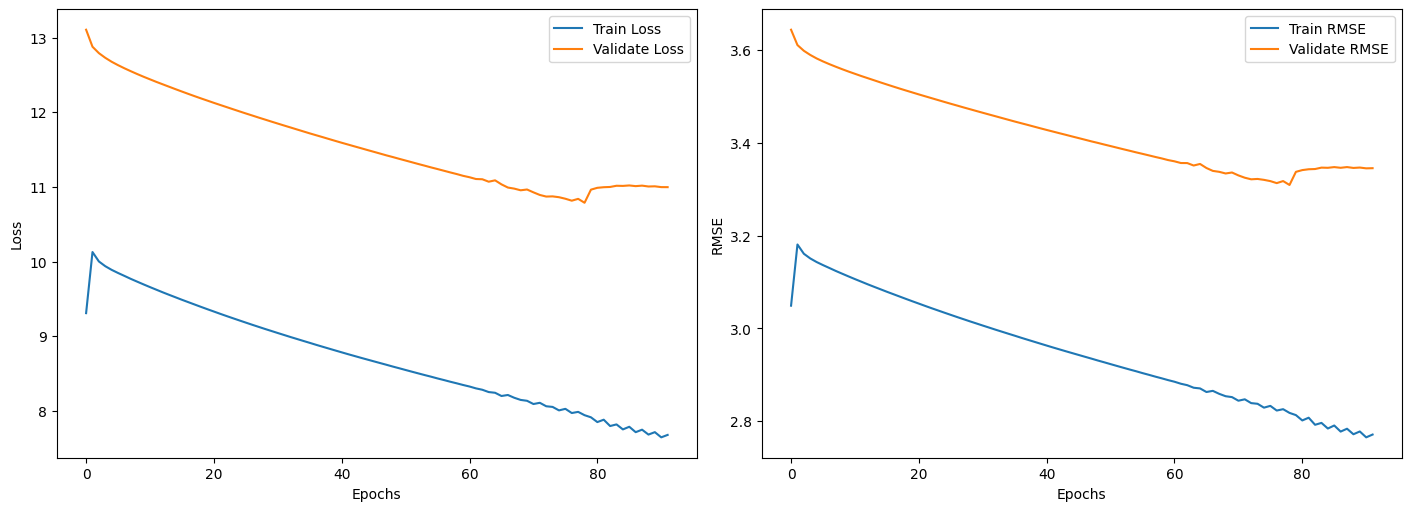

In [111]:
import matplotlib.pyplot as plt

epochs = range(len(train_losses))

fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

axes[0].plot(epochs, train_losses, label="Train Loss")
axes[0].plot(epochs, val_losses,   label="Validate Loss")
axes[0].set_xlabel("Epochs"); axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(epochs, train_rmse_hist, label="Train RMSE")
axes[1].plot(epochs, val_rmse_hist,   label="Validate RMSE")
axes[1].set_xlabel("Epochs"); axes[1].set_ylabel("RMSE")
axes[1].legend()


#### NN-2

In [144]:
import torch
from torch import nn, optim

#Shallow simple model
class Project_2(nn.Module):
    def __init__(self,N_in=71,N_out=1):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(N_in,16),
            nn.ReLU(),
            nn.Linear(16,16),
            nn.ReLU(),
            nn.Linear(16,N_out)
        )

    def forward(self,X):
        return self.seq(X)

model = Project_2()
print(model)

Project_3(
  (seq): Sequential(
    (0): Linear(in_features=71, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [145]:
import torch
torch.backends.cudnn.benchmark = True 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = model.to(device)

Using device: cuda


In [146]:
# Hyperparameters
lr = 1e-4
N_epochs = 200

# Loss and optimizer (regression)
loss_fun = nn.SmoothL1Loss(beta=1.0) 
optimizer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=1e-4)

# History
train_losses, val_losses = [], []
train_rmse_hist, val_rmse_hist = [], []
train_mae_hist,  val_mae_hist  = [], []
train_r2_hist,   val_r2_hist   = [], []

# Early stopping by validation RMSE
patience  = 20
min_delta = 0.02
best_val  = float('inf')
best_state = None
best_metrics = None
best_epoch  = -1 
bad_epochs = 0

for epoch in range(N_epochs):

    # Train
    model.train()
    batch_loss = []

    # accumulators for regression metrics
    n = 0
    sum_abs_err = 0.0
    sum_sq_err  = 0.0
    sum_y = 0.0
    sum_y2 = 0.0

    for batch in train_dataloader:
        # move to device and cast to float
        x = batch['features'].to(device, non_blocking=True).float()
        y = batch['outcome'].to(device, non_blocking=True).float().view(-1, 1)

        # forward + loss
        y_pred = model(x)                  
        loss = loss_fun(y_pred, y)   # MSE

        # backward + step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # track batch loss
        batch_loss.append(loss.detach().cpu().item())

        # accumulate metrics
        err = (y_pred - y)
        n += y.numel()
        sum_abs_err += err.abs().sum().item()
        sum_sq_err  += (err**2).sum().item()
        sum_y  += y.sum().item()
        sum_y2 += (y**2).sum().item()

    # epoch metrics (train)
    train_loss = float(np.mean(batch_loss))
    # safe denominator
    if n == 0:
        n = 1
    train_rmse = np.sqrt(sum_sq_err / n)
    train_mae  = (sum_abs_err / n)
    ss_tot = sum_y2 - (sum_y ** 2) / n
    if ss_tot <= 0:
        ss_tot = 1e-12  
    train_r2 = 1.0 - (sum_sq_err / ss_tot)

    # Validation
    model.eval()
    validate_batch_loss = []

    n = 0
    sum_abs_err = 0.0
    sum_sq_err  = 0.0
    sum_y = 0.0
    sum_y2 = 0.0

    with torch.no_grad():
        for batch in validate_dataloader:
            x = batch['features'].to(device, non_blocking=True).float()
            y = batch['outcome'].to(device, non_blocking=True).float().view(-1, 1)

            y_pred = model(x)
            vloss = loss_fun(y_pred, y)

            # track batch loss
            validate_batch_loss.append(vloss.detach().cpu().item())

            # accumulate metrics
            err = (y_pred - y)
            n += y.numel()
            sum_abs_err += err.abs().sum().item()
            sum_sq_err  += (err**2).sum().item()
            sum_y  += y.sum().item()
            sum_y2 += (y**2).sum().item()

    # epoch metrics (val)
    val_loss = float(np.mean(validate_batch_loss))
    # safe denominator
    if n == 0:
        n = 1
    val_rmse = np.sqrt(sum_sq_err / n)
    val_mae  = (sum_abs_err / n)

    ss_tot = sum_y2 - (sum_y ** 2) / n
    if ss_tot <= 0:
        ss_tot = 1e-12
    val_r2 = 1.0 - (sum_sq_err / ss_tot)
 

    # log history
    train_losses.append(train_loss);  val_losses.append(val_loss)
    train_rmse_hist.append(train_rmse); val_rmse_hist.append(val_rmse)
    train_mae_hist.append(train_mae);   val_mae_hist.append(val_mae)
    train_r2_hist.append(train_r2);     val_r2_hist.append(val_r2)

    # short summary per epoch
    print(f"Epoch {epoch:03d} | "
          f"train_loss={train_loss:8.3f}  val_loss={val_loss:8.3f} | "
          f"train_RMSE={train_rmse:6.3f}  val_RMSE={val_rmse:6.3f} | "
          f"train_MAE={train_mae:6.3f}   val_MAE={val_mae:6.3f} | "
          f"train_R2={train_r2:6.3f}    val_R2={val_r2:6.3f}")

    # early stopping by RMSE value
    if val_rmse < best_val - min_delta:
        best_val = val_rmse
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        best_metrics = {"RMSE": val_rmse, "MAE": val_mae, "R2": val_r2}
        bad_epochs = 0
        torch.save(model.state_dict(), "best_model_shallow_2_rmse.pt")
    else:
        bad_epochs += 1
        if bad_epochs >= patience:
            print("Early stopping.")
            break

# restore best checkpoint
if best_state is not None:
    model.load_state_dict({k: v.to(device) for k, v in best_state.items()})
    print(f"[BEST MODEL VALIDATION] "
            f"epoch={best_epoch} | RMSE={best_metrics['RMSE']:.4f} | "
            f"MAE={best_metrics['MAE']:.4f} | R^2={best_metrics['R2']:.4f}")

else:
    print("No checkpoint saved.")

Epoch 000 | train_loss=  63.766  val_loss=  63.393 | train_RMSE=64.513  val_RMSE=63.772 | train_MAE=64.189   val_MAE=63.404 | train_R2=-85.051    val_R2=-82.279
Epoch 001 | train_loss=  61.465  val_loss=  59.895 | train_RMSE=62.161  val_RMSE=60.284 | train_MAE=61.896   val_MAE=59.925 | train_R2=-78.890    val_R2=-73.419
Epoch 002 | train_loss=  56.621  val_loss=  53.712 | train_RMSE=57.255  val_RMSE=54.127 | train_MAE=57.062   val_MAE=53.773 | train_R2=-66.779    val_R2=-58.993
Epoch 003 | train_loss=  48.591  val_loss=  43.550 | train_RMSE=49.153  val_RMSE=44.013 | train_MAE=49.049   val_MAE=43.659 | train_R2=-48.952    val_R2=-38.668
Epoch 004 | train_loss=  36.255  val_loss=  28.942 | train_RMSE=36.780  val_RMSE=29.512 | train_MAE=36.733   val_MAE=29.120 | train_R2=-26.970    val_R2=-16.835
Epoch 005 | train_loss=  19.311  val_loss=   9.487 | train_RMSE=19.995  val_RMSE=10.519 | train_MAE=19.814   val_MAE= 9.755 | train_R2=-7.266    val_R2=-1.266
Epoch 006 | train_loss=   2.234  val

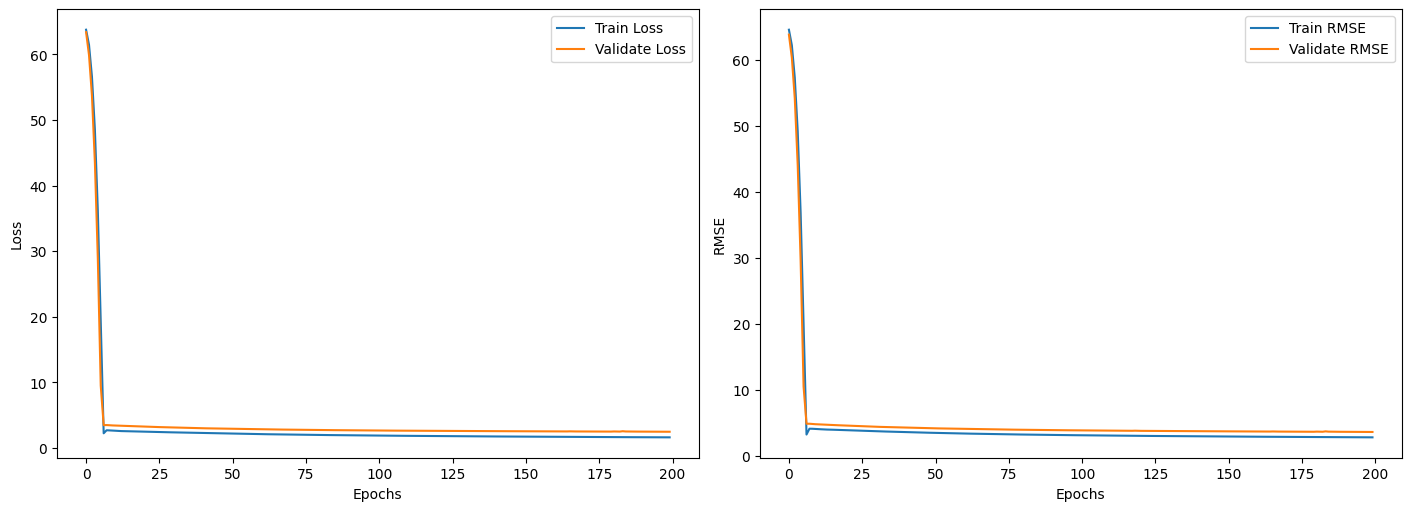

In [147]:
import matplotlib.pyplot as plt

epochs = range(len(train_losses))

fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

axes[0].plot(epochs, train_losses, label="Train Loss")
axes[0].plot(epochs, val_losses,   label="Validate Loss")
axes[0].set_xlabel("Epochs"); axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(epochs, train_rmse_hist, label="Train RMSE")
axes[1].plot(epochs, val_rmse_hist,   label="Validate RMSE")
axes[1].set_xlabel("Epochs"); axes[1].set_ylabel("RMSE")
axes[1].legend()


#### NN- 3

In [140]:
import torch
from torch import nn, optim

class Project_3(nn.Module):
    def __init__(self,N_in=71,N_out=1):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(N_in, 32),
            nn.ReLU(),
            nn.Dropout(0.05),

            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.05),

            nn.Linear(16, 8),
            nn.ReLU(),

            nn.Linear(8, N_out)
        )


    def forward(self,X):
        return self.seq(X)

model = Project_3()
print(model)

Project_8(
  (seq): Sequential(
    (0): Linear(in_features=71, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.05, inplace=False)
    (6): Linear(in_features=16, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [141]:
import torch
torch.backends.cudnn.benchmark = True 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = model.to(device)

Using device: cuda


In [142]:
# Hyperparameters
lr = 1e-4
N_epochs = 200

# Loss and optimizer (regression)
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=1e-5)

# History
train_losses, val_losses = [], []
train_rmse_hist, val_rmse_hist = [], []
train_mae_hist,  val_mae_hist  = [], []
train_r2_hist,   val_r2_hist   = [], []

# Early stopping by validation RMSE
patience  = 20
min_delta = 0.02
best_val  = float('inf')
best_state = None
best_metrics = None
best_epoch  = -1 
bad_epochs = 0

for epoch in range(N_epochs):

    # Train
    model.train()
    batch_loss = []

    # accumulators for regression metrics
    n = 0
    sum_abs_err = 0.0
    sum_sq_err  = 0.0
    sum_y = 0.0
    sum_y2 = 0.0

    for batch in train_dataloader:
        # move to device and cast to float
        x = batch['features'].to(device, non_blocking=True).float()
        y = batch['outcome'].to(device, non_blocking=True).float().view(-1, 1)

        # forward + loss
        y_pred = model(x)                  
        loss = loss_fun(y_pred, y)   # MSE

        # backward + step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # track batch loss
        batch_loss.append(loss.detach().cpu().item())

        # accumulate metrics
        err = (y_pred - y)
        n += y.numel()
        sum_abs_err += err.abs().sum().item()
        sum_sq_err  += (err**2).sum().item()
        sum_y  += y.sum().item()
        sum_y2 += (y**2).sum().item()

    # epoch metrics (train)
    train_loss = float(np.mean(batch_loss))
    # safe denominator
    if n == 0:
        n = 1
    train_rmse = np.sqrt(sum_sq_err / n)
    train_mae  = (sum_abs_err / n)
    ss_tot = sum_y2 - (sum_y ** 2) / n
    if ss_tot <= 0:
        ss_tot = 1e-12  
    train_r2 = 1.0 - (sum_sq_err / ss_tot)

    # Validation
    model.eval()
    validate_batch_loss = []

    n = 0
    sum_abs_err = 0.0
    sum_sq_err  = 0.0
    sum_y = 0.0
    sum_y2 = 0.0

    with torch.no_grad():
        for batch in validate_dataloader:
            x = batch['features'].to(device, non_blocking=True).float()
            y = batch['outcome'].to(device, non_blocking=True).float().view(-1, 1)

            y_pred = model(x)
            vloss = loss_fun(y_pred, y)

            # track batch loss
            validate_batch_loss.append(vloss.detach().cpu().item())

            # accumulate metrics
            err = (y_pred - y)
            n += y.numel()
            sum_abs_err += err.abs().sum().item()
            sum_sq_err  += (err**2).sum().item()
            sum_y  += y.sum().item()
            sum_y2 += (y**2).sum().item()

    # epoch metrics (val)
    val_loss = float(np.mean(validate_batch_loss))
    # safe denominator
    if n == 0:
        n = 1
    val_rmse = np.sqrt(sum_sq_err / n)
    val_mae  = (sum_abs_err / n)

    ss_tot = sum_y2 - (sum_y ** 2) / n
    if ss_tot <= 0:
        ss_tot = 1e-12
    val_r2 = 1.0 - (sum_sq_err / ss_tot)
 

    # log history
    train_losses.append(train_loss);  val_losses.append(val_loss)
    train_rmse_hist.append(train_rmse); val_rmse_hist.append(val_rmse)
    train_mae_hist.append(train_mae);   val_mae_hist.append(val_mae)
    train_r2_hist.append(train_r2);     val_r2_hist.append(val_r2)

    # short summary per epoch
    print(f"Epoch {epoch:03d} | "
          f"train_loss={train_loss:8.3f}  val_loss={val_loss:8.3f} | "
          f"train_RMSE={train_rmse:6.3f}  val_RMSE={val_rmse:6.3f} | "
          f"train_MAE={train_mae:6.3f}   val_MAE={val_mae:6.3f} | "
          f"train_R2={train_r2:6.3f}    val_R2={val_r2:6.3f}")

    # early stopping by RMSE value
    if val_rmse < best_val - min_delta:
        best_val = val_rmse
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        best_metrics = {"RMSE": val_rmse, "MAE": val_mae, "R2": val_r2}
        bad_epochs = 0
        torch.save(model.state_dict(), "best_model_shallow_3_drop_rmse.pt")
    else:
        bad_epochs += 1
        if bad_epochs >= patience:
            print("Early stopping.")
            break

# restore best checkpoint
if best_state is not None:
    model.load_state_dict({k: v.to(device) for k, v in best_state.items()})
    print(f"[BEST MODEL VALIDATION] "
            f"epoch={best_epoch} | RMSE={best_metrics['RMSE']:.4f} | "
            f"MAE={best_metrics['MAE']:.4f} | R^2={best_metrics['R2']:.4f}")

else:
    print("No checkpoint saved.")

Epoch 000 | train_loss=4381.560  val_loss=4383.644 | train_RMSE=66.104  val_RMSE=65.671 | train_MAE=65.761   val_MAE=65.303 | train_R2=-89.347    val_R2=-87.312
Epoch 001 | train_loss=4215.348  val_loss=4135.418 | train_RMSE=64.840  val_RMSE=63.776 | train_MAE=64.527   val_MAE=63.408 | train_R2=-85.926    val_R2=-82.290
Epoch 002 | train_loss=3846.166  val_loss=3624.926 | train_RMSE=61.941  val_RMSE=59.694 | train_MAE=61.683   val_MAE=59.327 | train_R2=-78.327    val_R2=-71.968
Epoch 003 | train_loss=3150.337  val_loss=2737.484 | train_RMSE=56.068  val_RMSE=51.841 | train_MAE=55.889   val_MAE=51.472 | train_R2=-63.996    val_R2=-54.033
Epoch 004 | train_loss=2116.802  val_loss=1580.257 | train_RMSE=45.968  val_RMSE=39.325 | train_MAE=45.830   val_MAE=38.937 | train_R2=-42.689    val_R2=-30.668
Epoch 005 | train_loss=1008.131  val_loss= 568.166 | train_RMSE=31.733  val_RMSE=23.474 | train_MAE=31.446   val_MAE=22.984 | train_R2=-19.820    val_R2=-10.283
Epoch 006 | train_loss= 286.156  v

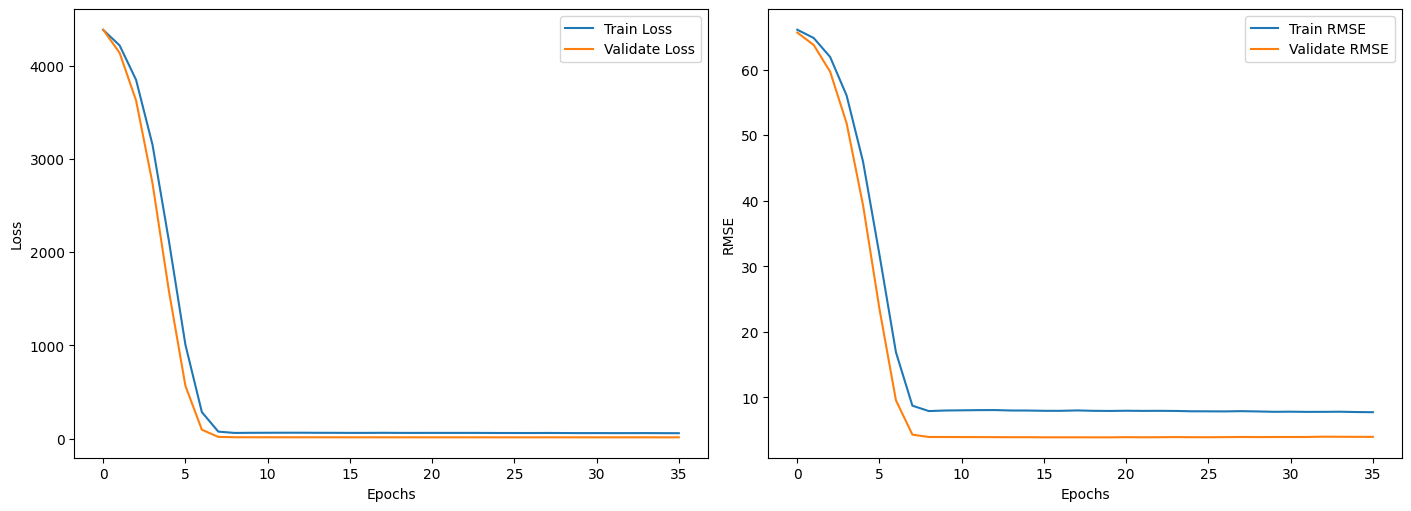

In [143]:
import matplotlib.pyplot as plt

epochs = range(len(train_losses))

fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

axes[0].plot(epochs, train_losses, label="Train Loss")
axes[0].plot(epochs, val_losses,   label="Validate Loss")
axes[0].set_xlabel("Epochs"); axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(epochs, train_rmse_hist, label="Train RMSE")
axes[1].plot(epochs, val_rmse_hist,   label="Validate RMSE")
axes[1].set_xlabel("Epochs"); axes[1].set_ylabel("RMSE")
axes[1].legend()

### NN- 4

In [163]:
train_dataloader = DataLoader(train_dataset, batch_size=1024, num_workers=8, persistent_workers=True, pin_memory=True)
validate_dataloader = DataLoader(validate_dataset, batch_size=1024, num_workers=8, persistent_workers=True, pin_memory=True)

In [164]:
import torch
from torch import nn, optim

class Project_4(nn.Module):
    def __init__(self,N_in=71,N_out=1):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(N_in,16),
            nn.ReLU(),
            nn.Dropout(0.10),
            nn.Linear(16,16),
            nn.ReLU(),
            nn.Linear(16,N_out)
        )

    def forward(self,X):
        return self.seq(X)

model = Project_4()
print(model)

Project_4(
  (seq): Sequential(
    (0): Linear(in_features=71, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=16, out_features=16, bias=True)
    (4): ReLU()
    (5): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [165]:
import torch
torch.backends.cudnn.benchmark = True 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = model.to(device)

Using device: cuda


In [166]:
# Hyperparameters
lr = 1e-4
N_epochs = 200

# Loss and optimizer (regression)
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=3e-5)

# History
train_losses, val_losses = [], []
train_rmse_hist, val_rmse_hist = [], []
train_mae_hist,  val_mae_hist  = [], []
train_r2_hist,   val_r2_hist   = [], []

# Early stopping by validation RMSE
patience  = 20
min_delta = 0.02
best_val  = float('inf')
best_state = None
best_metrics = None
best_epoch  = -1 
bad_epochs = 0

for epoch in range(N_epochs):

    # Train
    model.train()
    batch_loss = []

    # accumulators for regression metrics
    n = 0
    sum_abs_err = 0.0
    sum_sq_err  = 0.0
    sum_y = 0.0
    sum_y2 = 0.0

    for batch in train_dataloader:
        # move to device and cast to float
        x = batch['features'].to(device, non_blocking=True).float()
        y = batch['outcome'].to(device, non_blocking=True).float().view(-1, 1)

        # forward + loss
        y_pred = model(x)                  
        loss = loss_fun(y_pred, y)   # MSE

        # backward + step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # track batch loss
        batch_loss.append(loss.detach().cpu().item())

        # accumulate metrics
        err = (y_pred - y)
        n += y.numel()
        sum_abs_err += err.abs().sum().item()
        sum_sq_err  += (err**2).sum().item()
        sum_y  += y.sum().item()
        sum_y2 += (y**2).sum().item()

    # epoch metrics (train)
    train_loss = float(np.mean(batch_loss))
    # safe denominator
    if n == 0:
        n = 1
    train_rmse = np.sqrt(sum_sq_err / n)
    train_mae  = (sum_abs_err / n)
    ss_tot = sum_y2 - (sum_y ** 2) / n
    if ss_tot <= 0:
        ss_tot = 1e-12  
    train_r2 = 1.0 - (sum_sq_err / ss_tot)

    # Validation
    model.eval()
    validate_batch_loss = []

    n = 0
    sum_abs_err = 0.0
    sum_sq_err  = 0.0
    sum_y = 0.0
    sum_y2 = 0.0

    with torch.no_grad():
        for batch in validate_dataloader:
            x = batch['features'].to(device, non_blocking=True).float()
            y = batch['outcome'].to(device, non_blocking=True).float().view(-1, 1)

            y_pred = model(x)
            vloss = loss_fun(y_pred, y)

            # track batch loss
            validate_batch_loss.append(vloss.detach().cpu().item())

            # accumulate metrics
            err = (y_pred - y)
            n += y.numel()
            sum_abs_err += err.abs().sum().item()
            sum_sq_err  += (err**2).sum().item()
            sum_y  += y.sum().item()
            sum_y2 += (y**2).sum().item()

    # epoch metrics (val)
    val_loss = float(np.mean(validate_batch_loss))
    # safe denominator
    if n == 0:
        n = 1
    val_rmse = np.sqrt(sum_sq_err / n)
    val_mae  = (sum_abs_err / n)

    ss_tot = sum_y2 - (sum_y ** 2) / n
    if ss_tot <= 0:
        ss_tot = 1e-12
    val_r2 = 1.0 - (sum_sq_err / ss_tot)
 

    # log history
    train_losses.append(train_loss);  val_losses.append(val_loss)
    train_rmse_hist.append(train_rmse); val_rmse_hist.append(val_rmse)
    train_mae_hist.append(train_mae);   val_mae_hist.append(val_mae)
    train_r2_hist.append(train_r2);     val_r2_hist.append(val_r2)

    # short summary per epoch
    print(f"Epoch {epoch:03d} | "
          f"train_loss={train_loss:8.3f}  val_loss={val_loss:8.3f} | "
          f"train_RMSE={train_rmse:6.3f}  val_RMSE={val_rmse:6.3f} | "
          f"train_MAE={train_mae:6.3f}   val_MAE={val_mae:6.3f} | "
          f"train_R2={train_r2:6.3f}    val_R2={val_r2:6.3f}")

    # early stopping by RMSE value
    if val_rmse < best_val - min_delta:
        best_val = val_rmse
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        best_metrics = {"RMSE": val_rmse, "MAE": val_mae, "R2": val_r2}
        bad_epochs = 0
        torch.save(model.state_dict(), "best_model_shallow_4.pt")
    else:
        bad_epochs += 1
        if bad_epochs >= patience:
            print("Early stopping.")
            break

# restore best checkpoint
if best_state is not None:
    model.load_state_dict({k: v.to(device) for k, v in best_state.items()})
    print(f"[BEST MODEL VALIDATION] "
            f"epoch={best_epoch} | RMSE={best_metrics['RMSE']:.4f} | "
            f"MAE={best_metrics['MAE']:.4f} | R^2={best_metrics['R2']:.4f}")

else:
    print("No checkpoint saved.")

Epoch 000 | train_loss=4274.697  val_loss=4262.291 | train_RMSE=65.293  val_RMSE=64.751 | train_MAE=64.956   val_MAE=64.382 | train_R2=-87.144    val_R2=-84.855
Epoch 001 | train_loss=4076.074  val_loss=3994.892 | train_RMSE=63.760  val_RMSE=62.678 | train_MAE=63.452   val_MAE=62.309 | train_R2=-83.053    val_R2=-79.446
Epoch 002 | train_loss=3736.494  val_loss=3572.282 | train_RMSE=61.048  val_RMSE=59.255 | train_MAE=60.773   val_MAE=58.887 | train_R2=-76.056    val_R2=-70.900
Epoch 003 | train_loss=3219.517  val_loss=2952.001 | train_RMSE=56.671  val_RMSE=53.843 | train_MAE=56.440   val_MAE=53.477 | train_R2=-65.403    val_R2=-58.366
Epoch 004 | train_loss=2511.669  val_loss=2144.998 | train_RMSE=50.061  val_RMSE=45.858 | train_MAE=49.870   val_MAE=45.485 | train_R2=-50.816    val_R2=-42.062
Epoch 005 | train_loss=1661.599  val_loss=1280.288 | train_RMSE=40.721  val_RMSE=35.369 | train_MAE=40.506   val_MAE=34.972 | train_R2=-33.285    val_R2=-24.616
Epoch 006 | train_loss= 906.059  v

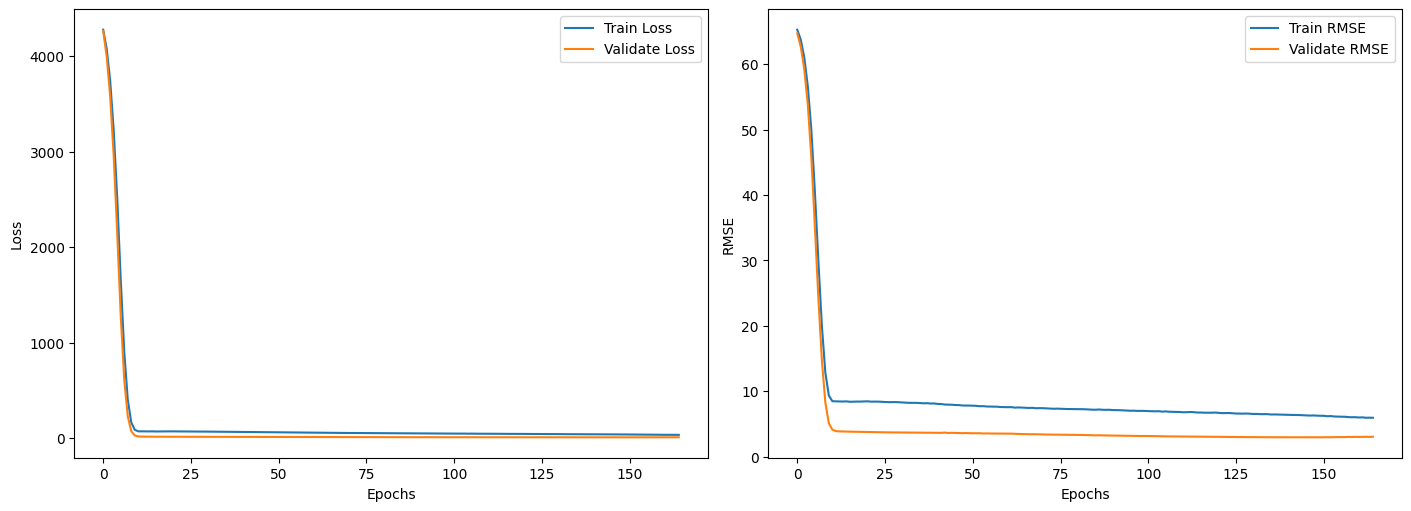

In [167]:
import matplotlib.pyplot as plt

epochs = range(len(train_losses))

fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

axes[0].plot(epochs, train_losses, label="Train Loss")
axes[0].plot(epochs, val_losses,   label="Validate Loss")
axes[0].set_xlabel("Epochs"); axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(epochs, train_rmse_hist, label="Train RMSE")
axes[1].plot(epochs, val_rmse_hist,   label="Validate RMSE")
axes[1].set_xlabel("Epochs"); axes[1].set_ylabel("RMSE")
axes[1].legend()

#### Conclusion of NN models

NN-1:
The baseline model (2 × 16 neurons, LR = 1e-4, weight decay = 1e-5) showed good training and validation performance (R² = 0.77, RMSE = 3.32, MAE = 2.66).
However, the validation curve stayed slightly above the training curve, suggesting mild overfitting and limited generalization.

NN-2:
We increased the weight decay to 1e-4 to apply stronger regularization.
The validation curve became unstable and R² dropped to 0.73, indicating the model was under-learning due to excessive regularization.

NN-3:
A deeper and wider network (3 layers) with a small dropout = 0.05 was tested to capture more nonlinear behavior.
Although R² = 0.68, the curves fluctuated and the training showed instability, suggesting poor convergence.

NN-4:
Same structure as NN-1 but with dropout = 0.10 and slightly higher weight decay.
The curves were smoother and more consistent (R² = 0.81, RMSE = 2.94, MAE = 2.32), indicating improved generalization — this model was selected for final testing.

In [172]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Project_4(N_in=71, N_out=1).to(device)

state = torch.load("best_model_shallow_4.pt", map_location=device)

state_dict = state["model_state_dict"] if isinstance(state, dict) and "model_state_dict" in state else state
model.load_state_dict(state_dict)
model.eval()

# evaluate
with torch.no_grad():
    y_true_list, y_pred_list = [], []
    for batch in test_dataloader:
        x = batch["features"].to(device).float()
        y = batch["outcome"].to(device).float().view(-1, 1)
        preds = model(x)
        y_true_list.append(y.cpu())
        y_pred_list.append(preds.cpu())

y_true = torch.cat(y_true_list).squeeze()
y_pred = torch.cat(y_pred_list).squeeze()

def rmse(y, p): return torch.sqrt(((y - p) ** 2).mean()).item()
def mae(y, p):  return (y - p).abs().mean().item()
def r2(y, p):
    ss_res = ((y - p) ** 2).sum()
    ss_tot = ((y - y.mean()) ** 2).sum()
    return (1 - ss_res / ss_tot).item()

print(f"[NN-4 | TEST]  RMSE={rmse(y_true, y_pred):.4f} | MAE={mae(y_true, y_pred):.4f} | R²={r2(y_true, y_pred):.4f}")


C:\Users\diego\AppData\Local\Temp\ipykernel_40356\1577739922.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load("best_model_shallow_4.pt", map_location=d

[NN-4 | TEST]  RMSE=2.9575 | MAE=2.3474 | R²=0.8141


## Model Comparison

Among the three models tested, Random Forest (RF) achieved the best performance with R² = 0.97, RMSE = 1.15, and MAE = 0.82, outperforming both Linear Regression (R² = 0.93) and Neural Network (R² = 0.81).
RF delivered strong accuracy with minimal tuning, effectively capturing nonlinear interactions among features. Its ensemble structure averages multiple decision trees, which naturally reduces model variance and prevents overfitting — making it well-suited for this dataset’s moderate complexity.

Linear Regression (LR) also performed strongly, confirming that the data exhibits an overall linear trend between features and the target. However, it lacks the flexibility to model subtle nonlinear interactions, which slightly limits its accuracy.

The Neural Network (NN), while capable of learning highly nonlinear mappings, was overparameterized for this dataset — the number of parameters exceeded the information complexity available, leading to less stable learning and weaker generalization compared to RF.

In summary, Random Forest was selected as the final model because it best balances interpretability, robustness, and the ability to capture nonlinear relationships without excessive complexity — making it the most suitable representation of the problem.